<font size = 5> <b> Statistical Data Analysis  </font> </b>


Since we have a lot of features due to different types of facilities located very close to each other, the first test we want to do is to determine if there are strong correlations between pairs of independent variables or between an independent and the dependent variable. 

To perform this test, we calculate the Variation Inflation Factor (VIF). The VIF is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.


We then remove the features that are colinear by taking the average of distances between different facilities that are colinear. 

Next, we plot a heat map between the different predictor variables, and the target variable. We then determine the independent variables that have a high correlation coefficient, a score of above 0.95 or -0.95. This test for multi-colinearity will identify features that are highly correlated with each other. However, one of the assumption of a linear regression model is the indepedent variables should be uncorrelated. Preserving highly correlated variables may result in coefficients from the regression not to be estimated precisely, and the standard errors are likely to be high. 


Next, we perform a Recursive Feature Elimination Method where features are dropped recursively and a model score is calculated at each step. The model with highest score is preserved, and the resulting features are given a rank, where a rank of 1 indicates the feature is important, and any other value indicates that the feature is not important. 

Finally, a lasso regularization method is used where irrelavant features are identified by penalizing it's coefficient to zero. 




In [3]:
#Import basic python packages for data analysis and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.lines as mlines
import pylab as plot
import matplotlib
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely.ops import nearest_points
import random
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import time

### Import Sklearn packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor



### Import Scipy stats packages
from scipy.stats import pearsonr
from scipy.stats import boxcox


# Import statsmodel packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices


#Sequential Feature Selector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS



import re


import warnings
warnings.filterwarnings("ignore")

sns.set(style = 'whitegrid')
sns.set_palette('bright')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<b> <font size =5> Test 1: Variation Inflation Factor Scores </b> </font>

In [12]:
## Reading input data
BC= pd.read_csv("Data/BC_input_clustered.csv")
NO2 = pd.read_csv("Data/NO2_input_clustered.csv")

In [13]:
#Convert columns to non-numeric 
BC = BC._get_numeric_data() #drop non-numeric cols
NO2 = NO2._get_numeric_data() #drop non-numeric cols

In [15]:
# Drop first column
BC.drop(BC.columns[0], axis=1, inplace=True)
NO2.drop(NO2.columns[0], axis=1, inplace=True)

### VIF scores for BC

In [16]:
BC.rename(columns = {'BC Value': 'BC_Value'}, inplace = True)

In [17]:
BC.head()

,BC_Value,high-AsphaltPlant-10510811_dist,high-AsphaltPlant-808611_dist,high-AutoRepair-138911_dist,high-AutoRepair-15714511_dist,high-ConcretePlant-10518911_dist,high-ConcretePlant-193511_dist,high-ConcretePlant-477811_dist,high-EGen-10707511_dist,high-EGen-136511_dist,high-EGen-772011_dist,high-Eateries-375111_dist,high-Eateries-771711_dist,high-FoodPlant-14318611_dist,high-FoodPlant-15713811_dist,high-FoodPlant-15756011_dist,high-FoodPlant-340611_dist,high-FoodPlant-343011_dist,high-FoodPlant-512911_dist,high-FoodPlant-808811_dist,high-Foundaries-10457711_dist,high-Foundaries-382111_dist,high-Foundaries-3963311_dist,high-Foundaries-405311_dist,high-Manufacturing-10457411_dist,high-Manufacturing-10476711_dist,high-Manufacturing-10708111_dist,high-Manufacturing-13801611_dist,high-Manufacturing-140211_dist,high-Manufacturing-14267411_dist,high-Manufacturing-380611_dist,high-Manufacturing-3963411_dist,high-Manufacturing-445511_dist,high-Manufacturing-515411_dist,high-Misc-18134411_dist,high-Misc-382911_dist,high-Retail-Res-10460511_dist,high-Retail-Res-10469511_dist,high-Retail-Res-10517111_dist,high-Retail-Res-1106211_dist,high-Retail-Res-137211_dist,high-Retail-Res-13761011_dist,high-Retail-Res-14122011_dist,high-Retail-Res-141411_dist,high-Retail-Res-14241511_dist,high-Retail-Res-14292411_dist,high-Retail-Res-15745711_dist,high-Retail-Res-15941111_dist,high-Retail-Res-17244511_dist,high-Retail-Res-18492711_dist,high-Retail-Res-203711_dist,high-Retail-Res-310211_dist,high-Retail-Res-310411_dist,high-Retail-Res-338911_dist,high-Retail-Res-448011_dist,high-Retail-Res-450311_dist,high-Transportation-18135311_dist,high-Transportation-444911_dist,high-WWTP-379511_dist,high-Waste-10708011_dist,high-Waste-168411_dist,high-Waste-18782611_dist,Precip,Radiation,Maxtemp,Mintemp,Pressure,Dist,number_intersections
0,0.818032,6.260157,4.498548,5.055463,11.180984,2.040220,5.345121,5.010194,5.577767,2.203323,2.459386,4.257761,7.073346,6.846074,8.275590,11.553851,12.208155,1.688757,9.219300,3.103170,10.131771,8.144133,4.772317,4.855038,3.833478,5.177325,11.640505,2.078224,6.778812,8.457198,7.471130,9.341895,10.445208,1.950165,5.254647,8.174086,3.600953,1.896254,5.466311,2.635694,3.389903,2.248262,7.537415,9.818741,2.825993,2.666421,3.665912,3.169434,10.531962,3.268653,5.063293,5.101844,6.113825,4.822267,6.252394,12.703707,0.808483,8.885505,1.923097,9.620051,1.688576,7.050727,1.650273,341.831694,20.744536,11.528689,922.076503,7.310329,3
1,0.551475,6.225561,4.536862,5.094900,11.142577,2.038467,5.311619,5.049036,5.602305,2.164149,2.438376,4.295196,7.038703,6.802082,8.241968,11.513420,12.170377,1.663445,9.180034,3.075784,10.091528,8.109038,4.811767,4.894845,3.868312,5.144002,11.602024,2.089358,6.745859,8.422646,7.431800,9.302295,10.404810,1.917977,5.295085,8.145796,3.612502,1.884551,5.493914,2.610019,3.386504,2.261906,7.512788,9.783986,2.805785,2.649914,3.651422,3.157078,10.492030,3.244833,5.102617,5.081015,6.072113,4.840239,6.276831,12.668309,0.833099,8.845215,1.941628,9.579673,1.688513,7.017086,1.650273,341.831694,20.744536,11.528689,922.076503,7.274900,3
2,0.593712,6.234118,4.518656,5.076528,11.153298,2.032285,5.319585,5.030749,5.587334,2.175306,2.440217,4.277135,7.047287,6.816590,8.250007,11.525389,12.180728,1.667244,9.191273,3.080629,10.103376,8.117870,4.793393,4.876424,3.850748,5.151872,11.612790,2.078529,6.753539,8.431184,7.443076,9.313739,10.416757,1.925208,5.276587,8.151116,3.601578,1.882327,5.478097,2.614031,3.381005,2.250246,7.516351,9.792636,2.807275,2.649767,3.650432,3.155178,10.503682,3.247985,5.084261,5.082819,6.084924,4.827232,6.261891,12.677313,0.817945,8.857092,1.928387,9.591607,1.681664,7.025132,1.650273,341.831694,20.744536,11.528689,922.076503,7.283908,3
3,0.489898,6.216077,4.554789,5.113038,11.130989,2.043743,5.302716,5.067063,5.616603,2.152221,2.435573,4.312942,7.029188,6.786923,8.232977,11.500640,12.159142,1.658762,9.167954,3.069979,10.078866,8.099277,4.829908,4.913050,3.885473,5.135194,11.590391,2.099374,6.737222,8.413170

<b> <font size = 4> Step 1: Set up a multiple regression model </b> </font>

In [ ]:
features = []
for i in range(1, 95):
    features.append("Q" + "(" + "'" + (str(BC.columns[i])) + "'" + ")")

features = ' + '.join(features)
    
# get y and X dataframes based on this regression:
y_BC_original, X_BC_original = dmatrices('BC_Value ~' + features, BC, return_type='dataframe')    


<b> <font size = 4> Step 2: Calculate VIFs  </b> </font>

In [ ]:
# For each X, calculate VIF and save in dataframe
vif_BC_original = pd.DataFrame()
vif_BC_original["VIF Factor"] = [variance_inflation_factor(X_BC_original.values, i) for i in range(X_BC_original.shape[1])]
vif_BC_original["features"] = X_BC_original.columns

<b> <font size = 4> Step 3: Inspect VIFs  </b> </font>

In [ ]:
vif_df_BC_original = vif_BC_original.round(1)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(vif_df_BC_original)

### VIF scores for NO2

In [18]:
NO2.rename(columns = {'NO2 Value': 'NO2_Value'}, inplace = True)

In [19]:
NO2.head()

,NO2_Value,high-AsphaltPlant-10510811_dist,high-AsphaltPlant-808611_dist,high-AutoRepair-195711_dist,high-EGen-10707511_dist,high-EGen-136511_dist,high-Eateries-375111_dist,high-Eateries-771711_dist,high-FoodPlant-14318611_dist,high-FoodPlant-340611_dist,high-FoodPlant-512911_dist,high-FoodPlant-804911_dist,high-FoodPlant-808811_dist,high-Foundaries-382111_dist,high-Foundaries-405311_dist,high-Manufacturing-10457511_dist,high-Manufacturing-13983311_dist,high-Manufacturing-140211_dist,high-Manufacturing-14071611_dist,high-Manufacturing-14182811_dist,high-Manufacturing-14267411_dist,high-Manufacturing-3963411_dist,high-Manufacturing-445511_dist,high-Manufacturing-4955911_dist,high-Manufacturing-773811_dist,high-Misc-13985611_dist,high-Misc-15974511_dist,high-Misc-18132711_dist,high-Misc-382911_dist,high-Retail-Res-10460511_dist,high-Retail-Res-10517111_dist,high-Retail-Res-127511_dist,high-Retail-Res-13761011_dist,high-Retail-Res-13825511_dist,high-Retail-Res-14122011_dist,high-Retail-Res-15721111_dist,high-Retail-Res-15745711_dist,high-Retail-Res-18133511_dist,high-Retail-Res-18135811_dist,high-Retail-Res-18495611_dist,high-Retail-Res-18496511_dist,high-Retail-Res-18697211_dist,high-Retail-Res-18697911_dist,high-Retail-Res-200611_dist,high-Retail-Res-310211_dist,high-Retail-Res-310411_dist,high-Retail-Res-338911_dist,high-Retail-Res-448011_dist,high-Retail-Res-7845611_dist,high-Transportation-444911_dist,high-WWTP-203811_dist,high-WWTP-379511_dist,high-Waste-10708011_dist,Precip,Radiation,Maxtemp,Mintemp,Pressure,Dist,number_intersections
0,17.539762,6.260157,4.498548,3.822018,5.577767,2.607717,4.257761,7.073346,6.846074,11.231343,9.219300,10.941845,3.103170,8.144133,4.398214,1.995507,9.126174,7.140331,9.853745,4.274371,8.457198,9.341895,11.332583,6.505475,6.189509,2.135228,2.217012,10.760076,8.174086,3.600953,5.466311,3.282128,2.248262,5.611028,7.537415,10.335052,3.665912,5.427697,10.272703,2.734718,3.048308,3.366278,8.400896,2.692443,5.101844,7.246638,4.822267,6.252394,4.895254,8.885505,9.705421,1.923097,9.620051,1.650273,341.831694,20.744536,11.528689,922.076503,4.542426,3
1,19.956750,6.225561,4.536862,3.854323,5.602305,2.574884,4.295196,7.038703,6.802082,11.192632,9.180034,10.901253,3.075784,8.109038,4.427051,1.970443,9.090484,7.107025,9.812993,4.301993,8.422646,9.302295,11.293823,6.472080,6.149757,2.096092,2.191907,10.723592,8.145796,3.612502,5.493914,3.267003,2.261906,5.630476,7.512788,10.296658,3.651422,5.419518,10.232197,2.716749,3.032168,3.342954,8.365318,2.701253,5.081015,7.210458,4.840239,6.276831,4.935025,8.845215,9.664781,1.941628,9.579673,1.650273,341.831694,20.744536,11.528689,922.076503,4.520412,3
2,23.967768,6.234118,4.518656,3.837317,5.587334,2.582470,4.277135,7.047287,6.816590,11.203536,9.191273,10.913324,3.080629,8.117870,4.410903,1.974141,9.099646,7.114893,9.825168,4.286164,8.431184,9.313739,11.304756,6.479994,6.161293,2.107225,2.195635,10.733200,8.151116,3.601578,5.478097,3.266277,2.250246,5.617015,7.516351,10.307371,3.650432,5.415936,10.244213,2.717242,3.031873,3.345877,8.374417,2.691247,5.082819,7.219890,4.827232,6.261891,4.916607,8.857092,9.676884,1.928387,9.591607,1.650273,341.831694,20.744536,11.528689,922.076503,4.526009,3
3,18.435184,6.216077,4.554789,3.870851,5.616603,2.566407,4.312942,7.029188,6.786923,11.180868,9.167954,10.888376,3.069979,8.099277,4.442628,1.965829,9.080400,7.098205,9.800020,4.317225,8.413170,9.290018,11.282032,6.463218,6.137405,2.084191,2.187248,10.713073,8.139460,3.622568,5.509127,3.266724,2.272773,5.643168,7.508184,10.285078,3.651394,5.422063,10.219375,2.715272,3.031466,3.339039,8.355299,2.710396,5.078175,7.200120,4.852459,6.291092,4.953222,8.832527,9.651876,1.954152,9.566930,1.650273,341.831694,20.744536,11.528689,922.076503,4.514243,3
4,25.797037,6.241503,4.500216,3.819827,5.571631,2.588925,4.258799,7.054695,6.830232,11.213339,9.201431,10.924356,3.084273,8.125529,4.394153,1.976688,9.107642,7.121563,9.836310,4.269696,8.438537,9.324113,11.314590,6.486715,6.171775,2.117360,2.19

<b> <font size = 4> Step 1: Set up a multiple regression model </b> </font>

In [ ]:
features = []
for i in range(1, 87):
    features.append("Q" + "(" + "'" + (str(NO2.columns[i])) + "'" + ")")

features = ' + '.join(features)
    
# get y and X dataframes based on this regression:
y_NO2_original, X_NO2_original = dmatrices('NO2_Value ~' + features, NO2, return_type='dataframe')    


<b> <font size = 4> Step 2: Calculate VIFs  </b> </font>

In [ ]:
# For each X, calculate VIF and save in dataframe
vif_NO2_original = pd.DataFrame()
vif_NO2_original["VIF Factor"] = [variance_inflation_factor(X_NO2_original.values, i) for i in range(X_NO2_original.shape[1])]
vif_NO2_original["features"] = X_NO2_original.columns

<b> <font size = 4> Step 3: Inspect VIFs  </b> </font>

In [ ]:
vif_df_NO2_original = vif_NO2_original.round(1)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(vif_df_NO2_original)

<font size = 3> <b> Result: </b> Inspecting the VIF scores for the facilities, there are several facilities that have a very high VIF score, indicating that explain the same variance in the data set. Looking at the VIF scores, and a map of the facilities, I combined facilities that are of a silimiar source category located with 1kmn from each other into a single point by taking the centroid of all facilities. This type of clustering results in reducing the number of input features </font>

### Display facilities on a map before clustering points

In [ ]:
#### Load Basemap for Oakland
oakl = gpd.read_file('Oakland-shapefile/OaklandZoning_Eff20181211_Ord13513.shp')

In [ ]:
### Set the coordinate reference system
crs = {'init': 'epsg:4326'}

In [ ]:
#Read input files
Facility_PM = pd.read_csv("Data/PM_Facility_Data.csv")

Facility_NO2 = pd.read_csv("Data/NO2_Facility_Data.csv")

In [ ]:
#Select only facilities as "High" sources

Facility_PM_high = Facility_PM[Facility_PM['ems-type'] == 'high']

Facility_NO2_high = Facility_NO2[Facility_NO2['ems-type'] == 'high']

In [ ]:
### Create a geopandas dataframe for PM data with coordinate reference system as epsg4326

# Create a list of x and y coordinates to convert to a geodataframe using Facility_PM_high
geometry_facility_PM = [Point(xy) for xy in zip(Facility_PM_high['longitude'], Facility_PM_high['latitude'])]

geo_df_facility_PM = gpd.GeoDataFrame(Facility_PM_high, crs = crs, geometry = geometry_facility_PM)

In [ ]:
### Create a geopandas dataframe for NO2 data with coordinate reference system as epsg4326

# Create a list of x and y coordinates to convert to a geodataframe using geopandas
geometry_facility_NO2 = [Point(xy) for xy in zip(Facility_NO2_high['longitude'], Facility_NO2_high['latitude'])]

geo_df_facility_NO2 = gpd.GeoDataFrame(Facility_NO2_high, crs = crs, geometry = geometry_facility_NO2)

In [ ]:
#### PM Plot - Facilities classified as high

fig, ax = plt.subplots(figsize = (30,30)) #This creates a figure axis
oakl.plot(ax=ax, color='grey', alpha = 0.1, edgecolor='black')            # Basemap of City of Oakland from the Oakland shapefile
geo_df_facility_PM.plot(ax=ax, column = 'source-type', legend = True, markersize =100, marker = 'o', cmap = 'gist_ncar')
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plot.rcParams.update(params)

leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 1, 1))
leg.set_title('Facility Categories', prop={'size':30})
ax.tick_params(labelsize=25) 
plt.title("Location of Facilities - PM, without clustering", size = 30)




plt.show()

In [ ]:
#### NO2 Plot - Facilities classified as high


fig, ax = plt.subplots(figsize = (30,30)) #This creates a figure axis
oakl.plot(ax=ax, color='grey', alpha = 0.1, edgecolor='black')            # Basemap of City of Oakland from the Oakland shapefile
geo_df_facility_NO2.plot(ax=ax, column = 'source-type', legend = True, markersize =100, marker = 'o', cmap = 'gist_ncar')
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plot.rcParams.update(params)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 1, 1))
leg.set_title('Facility Categories', prop={'size':30})
ax.tick_params(labelsize=25) 
plt.title("Location of Facilities - NO2, without clustering", size = 30)

plt.show()

### Display facilities on a map after clustering

In [ ]:
BC_clustered_lat_lon = pd.read_csv("Data/PM_Facilities_High_Centroid.csv")
NO2_clustered_lat_lon = pd.read_csv("Data/NO2_Facilities_High_Centroid.csv")

In [ ]:
### Create a geopandas dataframe for PM data with coordinate reference system as epsg4326

# Create a list of x and y coordinates to convert to a geodataframe using Facility_PM_high
geometry_facility_PM_clustered = [Point(xy) for xy in zip(BC_clustered_lat_lon['Centroid_Y'], BC_clustered_lat_lon['Centroid_X'])]

geo_df_facility_PM_clustered = gpd.GeoDataFrame(BC_clustered_lat_lon, crs = crs, geometry = geometry_facility_PM_clustered)

In [ ]:
### Create a geopandas dataframe for NO2 data with coordinate reference system as epsg4326

# Create a list of x and y coordinates to convert to a geodataframe using Facility_PM_high
geometry_facility_NO2_clustered = [Point(xy) for xy in zip(NO2_clustered_lat_lon['Centroid_Y'], NO2_clustered_lat_lon['Centroid_X'])]

geo_df_facility_NO2_clustered = gpd.GeoDataFrame(NO2_clustered_lat_lon, crs = crs, geometry = geometry_facility_NO2_clustered)

In [ ]:
#### PM Plot - Facilities classified as high - Clustered

fig, ax = plt.subplots(figsize = (30,30)) #This creates a figure axis
oakl.plot(ax=ax, color='grey', alpha = 0.1, edgecolor='black')            # Basemap of City of Oakland from the Oakland shapefile
geo_df_facility_PM_clustered.plot(ax=ax, column = 'source_typ', legend = True, markersize =100, marker = 'o', cmap = 'gist_ncar')
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plot.rcParams.update(params)

leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 1, 1))
leg.set_title('Facility Categories', prop={'size':30})
ax.tick_params(labelsize=25) 

plt.title("Location of Facilities - PM, after clustering", size = 30)



plt.show()

In [ ]:
#### NO2 Plot - Facilities classified as high - Clustered


fig, ax = plt.subplots(figsize = (30,30)) #This creates a figure axis
oakl.plot(ax=ax, color='grey', alpha = 0.1, edgecolor='black')            # Basemap of City of Oakland from the Oakland shapefile
geo_df_facility_NO2_clustered.plot(ax=ax, column = 'source-typ', legend = True, markersize =100, marker = 'o', cmap = 'gist_ncar')
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plot.rcParams.update(params)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 1, 1))
leg.set_title('Facility Categories', prop={'size':30})
ax.tick_params(labelsize=25) 

plt.title("Location of Facilities - NO2, after clustering", size = 30)


plt.show()

<b> <font size =5> Load Input Data Frame with Clustered Points</b> </font>

In [2]:
BC_clustered = pd.read_csv("Data/BC_input_clustered.csv")
NO2_clustered = pd.read_csv("Data/NO2_input_clustered.csv")

<b> <font size =5> Test 2: Plot Heat Map of Correlation Between Features</b> </font>

In [95]:
BC_clustered.drop(columns = ['Unnamed: 0'], inplace=True)
NO2_clustered.drop(columns = ['Unnamed: 0'], inplace=True)

In [96]:
BC_clustered.head()

,BC Value,high-AsphaltPlant-10510811_dist,high-AsphaltPlant-808611_dist,high-AutoRepair-138911_dist,high-AutoRepair-15714511_dist,high-ConcretePlant-10518911_dist,high-ConcretePlant-193511_dist,high-ConcretePlant-477811_dist,high-EGen-10707511_dist,high-EGen-136511_dist,high-EGen-772011_dist,high-Eateries-375111_dist,high-Eateries-771711_dist,high-FoodPlant-14318611_dist,high-FoodPlant-15713811_dist,high-FoodPlant-15756011_dist,high-FoodPlant-340611_dist,high-FoodPlant-343011_dist,high-FoodPlant-512911_dist,high-FoodPlant-808811_dist,high-Foundaries-10457711_dist,high-Foundaries-382111_dist,high-Foundaries-3963311_dist,high-Foundaries-405311_dist,high-Manufacturing-10457411_dist,high-Manufacturing-10476711_dist,high-Manufacturing-10708111_dist,high-Manufacturing-13801611_dist,high-Manufacturing-140211_dist,high-Manufacturing-14267411_dist,high-Manufacturing-380611_dist,high-Manufacturing-3963411_dist,high-Manufacturing-445511_dist,high-Manufacturing-515411_dist,high-Misc-18134411_dist,high-Misc-382911_dist,high-Retail-Res-10460511_dist,high-Retail-Res-10469511_dist,high-Retail-Res-10517111_dist,high-Retail-Res-1106211_dist,high-Retail-Res-137211_dist,high-Retail-Res-13761011_dist,high-Retail-Res-14122011_dist,high-Retail-Res-141411_dist,high-Retail-Res-14241511_dist,high-Retail-Res-14292411_dist,high-Retail-Res-15745711_dist,high-Retail-Res-15941111_dist,high-Retail-Res-17244511_dist,high-Retail-Res-18492711_dist,high-Retail-Res-203711_dist,high-Retail-Res-310211_dist,high-Retail-Res-310411_dist,high-Retail-Res-338911_dist,high-Retail-Res-448011_dist,high-Retail-Res-450311_dist,high-Transportation-18135311_dist,high-Transportation-444911_dist,high-WWTP-379511_dist,high-Waste-10708011_dist,high-Waste-168411_dist,high-Waste-18782611_dist,Precip,Radiation,Maxtemp,Mintemp,Pressure,Dist,number_intersections
0,0.818032,6.260157,4.498548,5.055463,11.180984,2.040220,5.345121,5.010194,5.577767,2.203323,2.459386,4.257761,7.073346,6.846074,8.275590,11.553851,12.208155,1.688757,9.219300,3.103170,10.131771,8.144133,4.772317,4.855038,3.833478,5.177325,11.640505,2.078224,6.778812,8.457198,7.471130,9.341895,10.445208,1.950165,5.254647,8.174086,3.600953,1.896254,5.466311,2.635694,3.389903,2.248262,7.537415,9.818741,2.825993,2.666421,3.665912,3.169434,10.531962,3.268653,5.063293,5.101844,6.113825,4.822267,6.252394,12.703707,0.808483,8.885505,1.923097,9.620051,1.688576,7.050727,1.650273,341.831694,20.744536,11.528689,922.076503,7.310329,3
1,0.551475,6.225561,4.536862,5.094900,11.142577,2.038467,5.311619,5.049036,5.602305,2.164149,2.438376,4.295196,7.038703,6.802082,8.241968,11.513420,12.170377,1.663445,9.180034,3.075784,10.091528,8.109038,4.811767,4.894845,3.868312,5.144002,11.602024,2.089358,6.745859,8.422646,7.431800,9.302295,10.404810,1.917977,5.295085,8.145796,3.612502,1.884551,5.493914,2.610019,3.386504,2.261906,7.512788,9.783986,2.805785,2.649914,3.651422,3.157078,10.492030,3.244833,5.102617,5.081015,6.072113,4.840239,6.276831,12.668309,0.833099,8.845215,1.941628,9.579673,1.688513,7.017086,1.650273,341.831694,20.744536,11.528689,922.076503,7.274900,3
2,0.593712,6.234118,4.518656,5.076528,11.153298,2.032285,5.319585,5.030749,5.587334,2.175306,2.440217,4.277135,7.047287,6.816590,8.250007,11.525389,12.180728,1.667244,9.191273,3.080629,10.103376,8.117870,4.793393,4.876424,3.850748,5.151872,11.612790,2.078529,6.753539,8.431184,7.443076,9.313739,10.416757,1.925208,5.276587,8.151116,3.601578,1.882327,5.478097,2.614031,3.381005,2.250246,7.516351,9.792636,2.807275,2.649767,3.650432,3.155178,10.503682,3.247985,5.084261,5.082819,6.084924,4.827232,6.261891,12.677313,0.817945,8.857092,1.928387,9.591607,1.681664,7.025132,1.650273,341.831694,20.744536,11.528689,922.076503,7.283908,3
3,0.489898,6.216077,4.554789,5.113038,11.130989,2.043743,5.302716,5.067063,5.616603,2.152221,2.435573,4.312942,7.029188,6.786923,8.232977,11.500640,12.159142,1.658762,9.167954,3.069979,10.078866,8.099277,4.829908,4.913050,3.885473,5.135194,11.590391,2.099374,6.737222,8.413170

In [97]:
### Plot a heat map - Black Carbon
corr_BC = BC_clustered.corr()
arr_corr_BC= corr_BC.as_matrix()

module://ipykernel.pylab.backend_inline


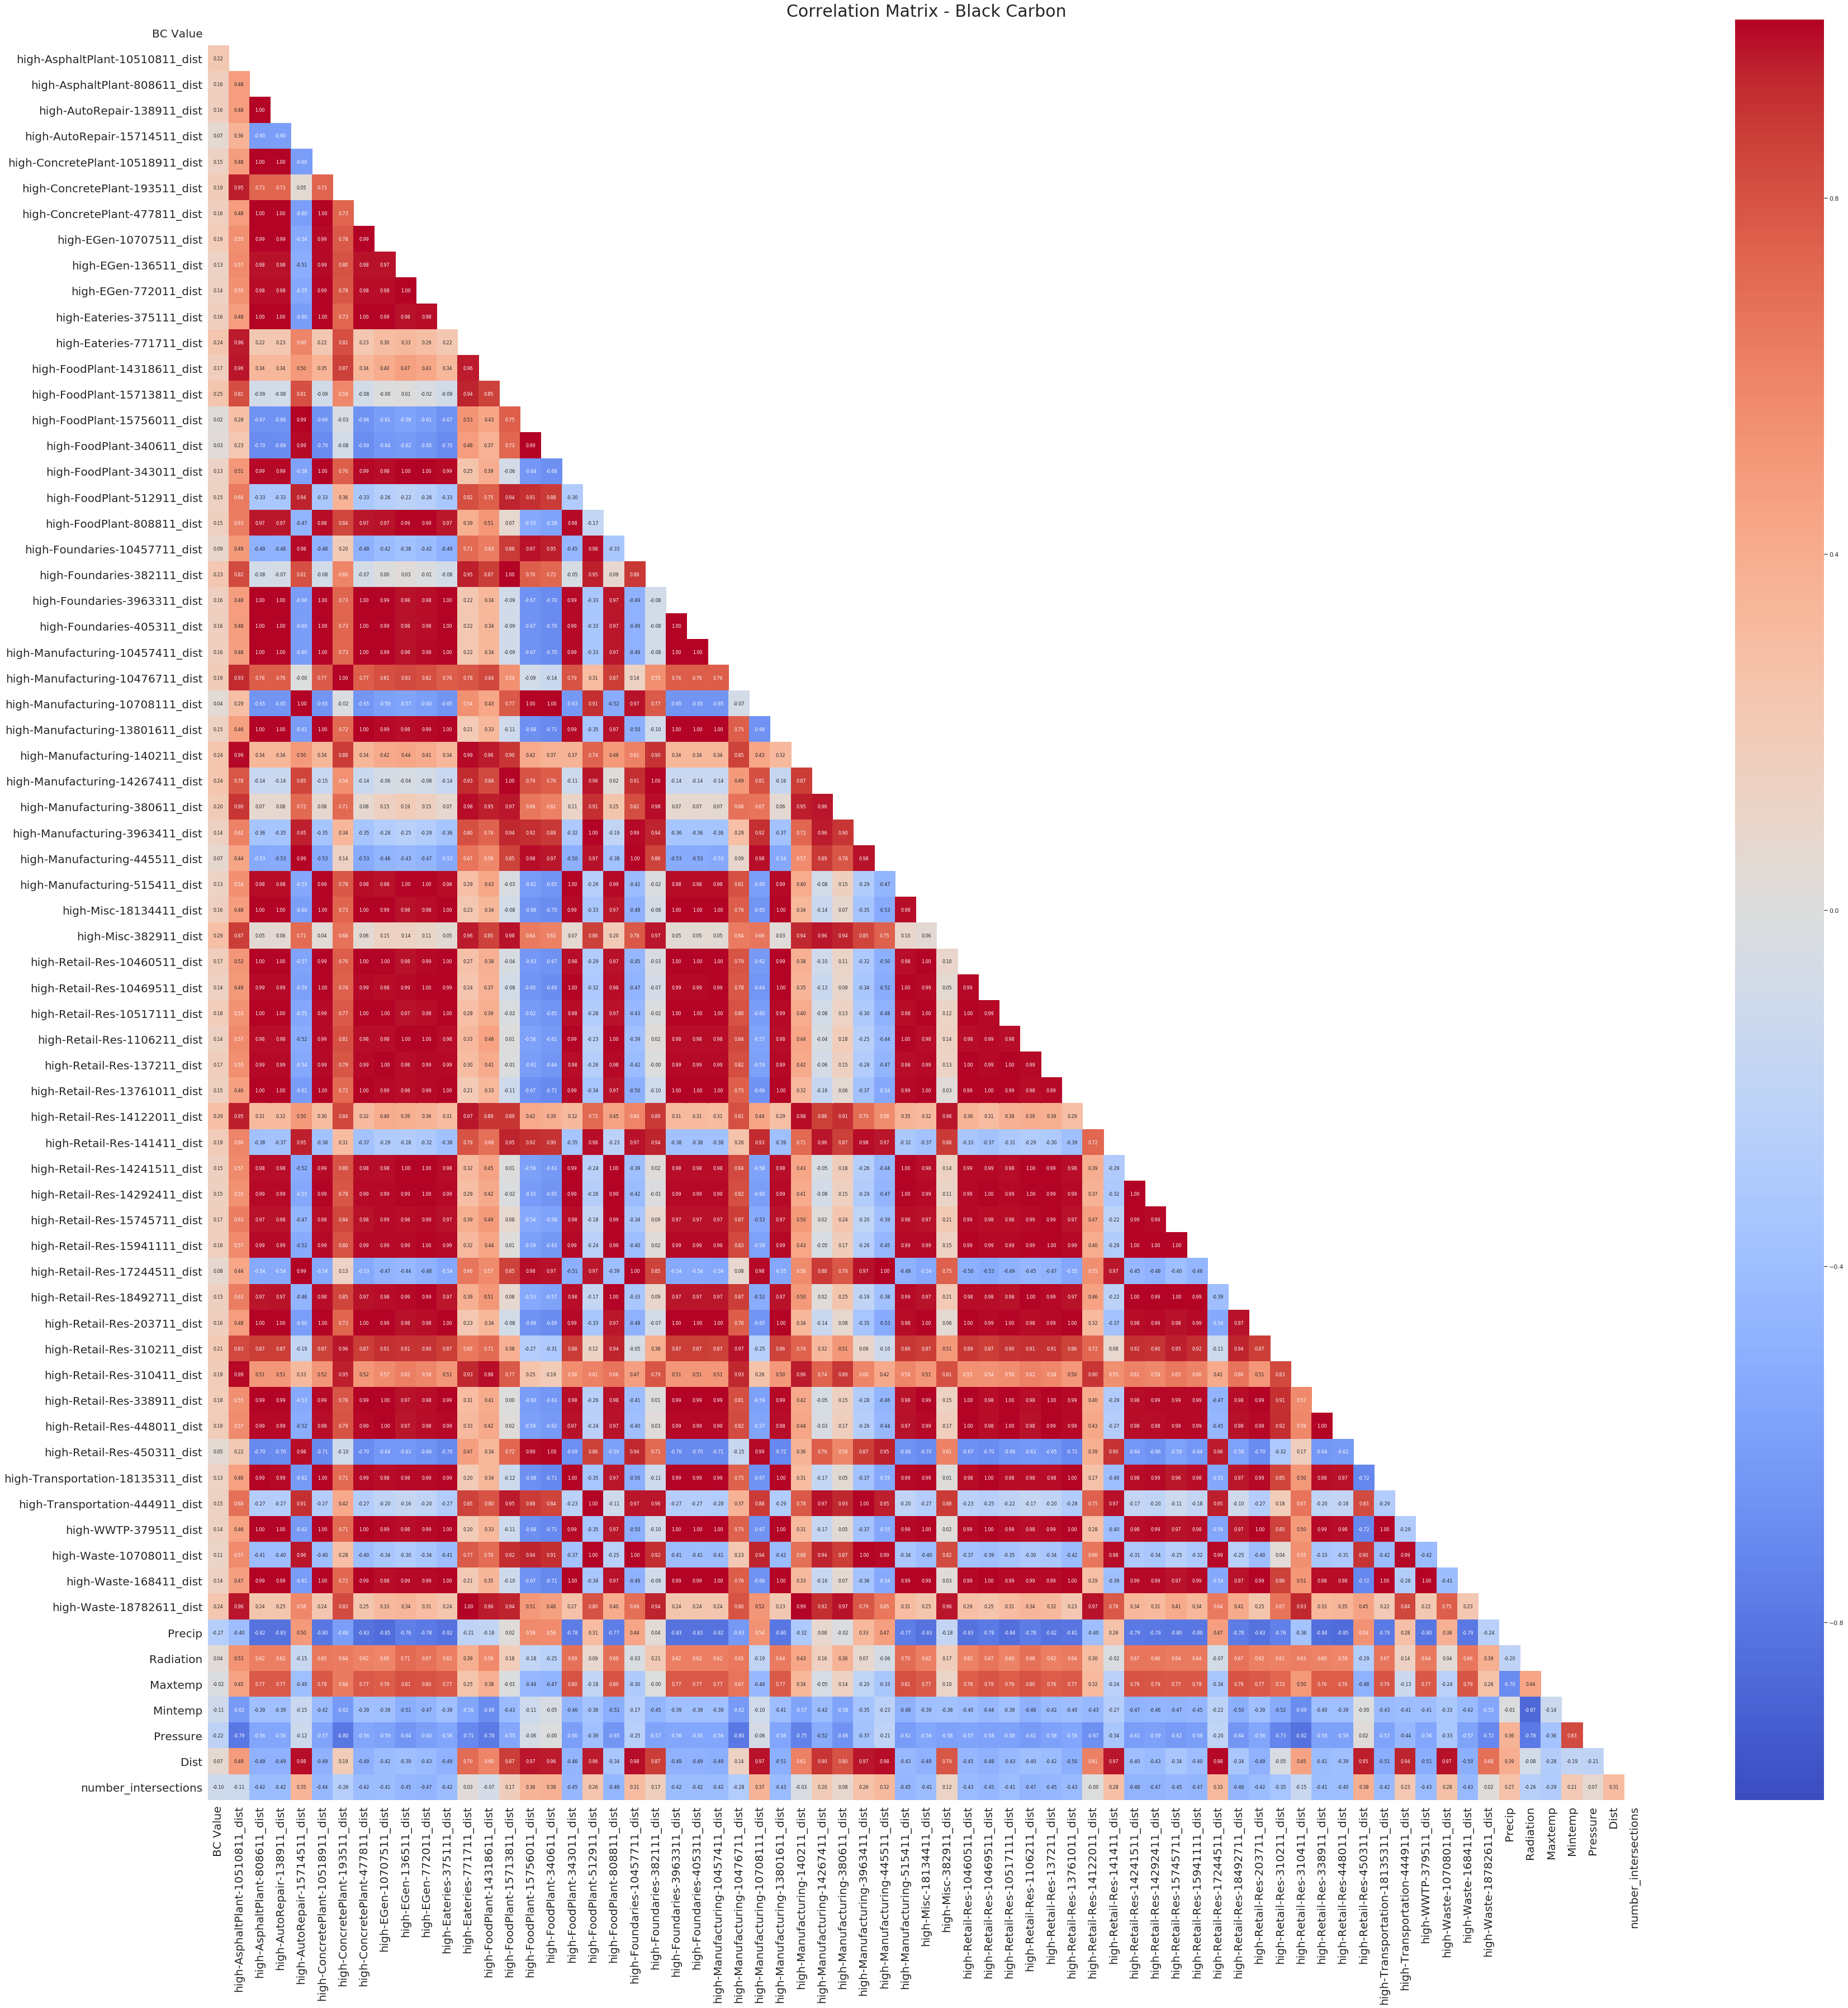

In [98]:
print(plt.get_backend())

# close any existing plots
plt.close("all")

# mask out the top triangle
arr_corr_BC[np.triu_indices_from(arr_corr_BC)] = np.nan

fig, ax = plt.subplots(figsize=(50, 50))

hm = sns.heatmap(arr_corr_BC, cbar=True, vmin = -1, vmax = 1, center = 0,
                 fmt='.2f', annot_kws={'size': 8}, annot=True, 
                 square=False, cmap = 'coolwarm')
#cmap=plt.cm.Blues

ticks = np.arange(corr_BC.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr_BC.columns, rotation=90, fontsize=20)
ax.set_yticks(ticks)
ax.set_yticklabels(corr_BC.index, rotation=360, fontsize=20)

ax.set_title('Correlation Matrix - Black Carbon', fontsize  = 30)
plt.tight_layout()
#plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

In [99]:
### Plot a heat map - Nitrogen Dioxide
corr_NO2 = NO2_clustered.corr()
arr_corr_NO2= corr_NO2.as_matrix()

module://ipykernel.pylab.backend_inline


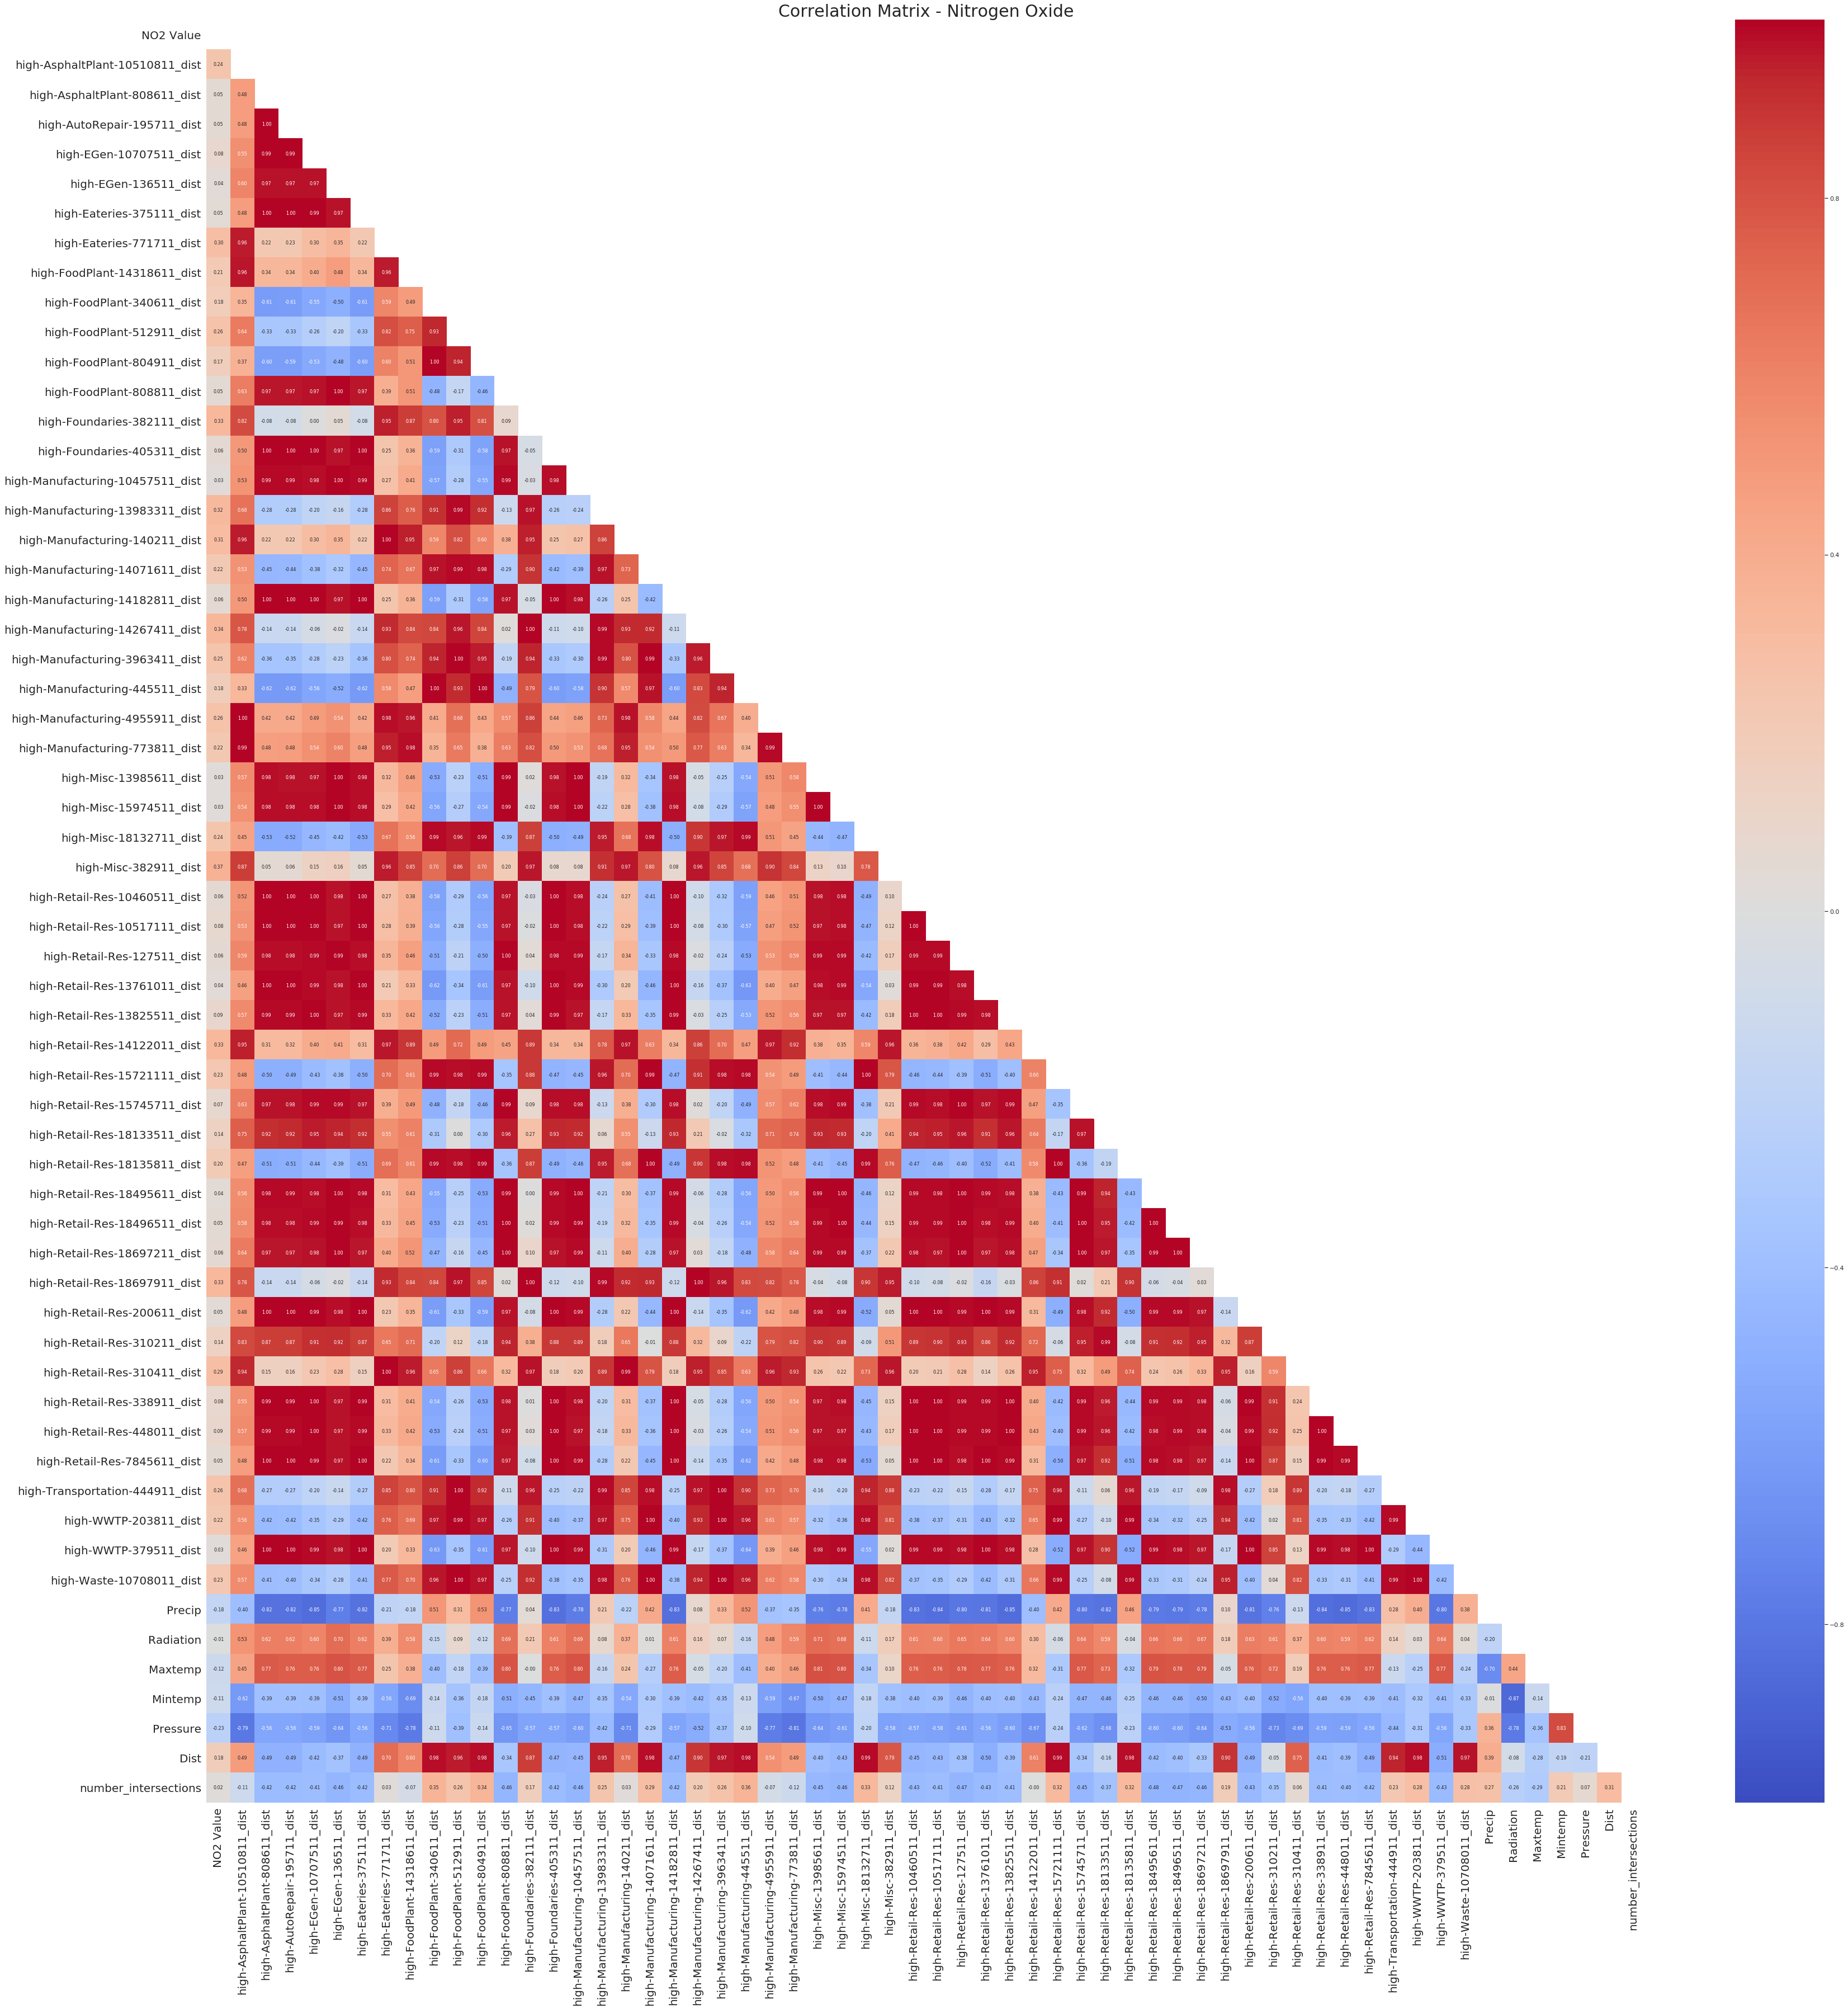

In [100]:
print(plt.get_backend())

# close any existing plots
plt.close("all")

# mask out the top triangle
arr_corr_NO2[np.triu_indices_from(arr_corr_NO2)] = np.nan

fig, ax = plt.subplots(figsize=(50, 50))

hm = sns.heatmap(arr_corr_NO2, cbar=True, vmin = -1, vmax = 1, center = 0,
                 fmt='.2f', annot_kws={'size': 8}, annot=True, 
                 square=False, cmap = 'coolwarm')
#cmap=plt.cm.Blues

ticks = np.arange(corr_NO2.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr_NO2.columns, rotation=90, fontsize=20)
ax.set_yticks(ticks)
ax.set_yticklabels(corr_NO2.index, rotation=360, fontsize=20)

ax.set_title('Correlation Matrix - Nitrogen Oxide', fontsize  = 30)
plt.tight_layout()
#plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

<font size = 3> <b> Result: </b> Looking at the correlation heat map, there are a lot of features that are highly correlated. Next we identify features that have a correlation coefficient above 0.95 since having highly correlated fetures would result in multicolinearity.  </font>

<b> <font size = 5> Test 3: Identifying features that have a high correlation, with a correlation coefficient above 0.9 </b> </font>

<b> <font size = 3> Identifying highly correlation features in BC dataset </b> </font>

In [3]:
# First, create a dataframe with only the features and drop the taget variable, which is BC Value.
BC_features = BC_clustered.drop(columns = ['BC Value'])
BC_features.head()

,Unnamed: 0,high-AsphaltPlant-10510811_dist,high-AsphaltPlant-808611_dist,high-AutoRepair-138911_dist,high-AutoRepair-15714511_dist,high-ConcretePlant-10518911_dist,high-ConcretePlant-193511_dist,high-ConcretePlant-477811_dist,high-EGen-10707511_dist,high-EGen-136511_dist,...,high-Waste-10708011_dist,high-Waste-168411_dist,high-Waste-18782611_dist,Precip,Radiation,Maxtemp,Mintemp,Pressure,Dist,number_intersections
0,0,6.260157,4.498548,5.055463,11.180984,2.040220,5.345121,5.010194,5.577767,2.203323,...,9.620051,1.688576,7.050727,1.650273,341.831694,20.744536,11.528689,922.076503,7.310329,3
1,1,6.225561,4.536862,5.094900,11.142577,2.038467,5.311619,5.049036,5.602305,2.164149,...,9.579673,1.688513,7.017086,1.650273,341.831694,20.744536,11.528689,922.076503,7.274900,3
2,2,6.234118,4.518656,5.076528,11.153298,2.032285,5.319585,5.030749,5.587334,2.175306,...,9.591607,1.681664,7.025132,1.650273,341.831694,20.744536,11.528689,922.076503,7.283908,3
3,3,6.216077,4.554789,5.113038,11.130989,2.043743,5.302716,5.067063,5.616603,2.152221,...,9.566930,1.694495,7.008094,1.650273,341.831694,20.744536,11.528689,922.076503,7.264972,3
4,4,6.241503,4.500216,5.057980,11.162910,2.025006,5.326370,5.012254,5.571631,2.185464,...,9.602495,1.673765,7.031985,1.650273,341.831694,20.744536,11.528689,922.076503,7.291752,3


In [102]:
len(BC_features)

21488

In [103]:
# Next determine the correlation matrix between all the input features
BC_features_corr = BC_features.corr()

In [104]:
# Next, identify all the features that have a correlation higher than 0.90 or lower than -0.90 indicating a strong positive or negative correlation
threshold_1 = 0.90
threshold_2 = -0.90


columns = np.full((BC_features_corr.shape[0],), True, dtype=bool)
for i in range(BC_features_corr.shape[0]):
    for j in range(i+1, BC_features_corr.shape[0]):
        if (BC_features_corr.iloc[i,j] >= threshold_1) | (BC_features_corr.iloc[i,j] <= threshold_2) :
            if columns[j]:
                columns[j] = False
selected_columns = BC_features.columns[columns]
selected_columns
#df_boston = df_boston[selected_columns]

Index(['high-AsphaltPlant-10510811_dist', 'high-AsphaltPlant-808611_dist',
       'high-AutoRepair-15714511_dist', 'Precip', 'Radiation', 'Maxtemp',
       'Mintemp', 'Pressure', 'number_intersections'],
      dtype='object')

<font size = 3> <b> Result: </b> The only features that are not highly correlated in the BC dataset include ''10457411-Manufacturing-high_dist', '10476711-Manufacturing-high_dist',
       '10457711-Foundaries-high_dist', 'Precip', 'Radiation', 'Maxtemp',
       'Mintemp', 'Pressure', 'number_intersections'. Before dropping them from the model, we will first fit a linear regression model and use recurrsive feature elimination method to drop features from the model. </font>

<b> <font size = 3> Fit a linear regression model only with the varibles that are not highly correlated using OLS- BC dataset</b> </font>

In [4]:
BC_clustered.rename(columns = {'BC Value': 'BC_Value'}, inplace = True)

In [ ]:
BC_clustered.rename(columns = {'high-AsphaltPlant-10510811_dist': 'Asphalt1', 'high-AsphaltPlant-808611_dist' : 'Asphalt2',
                              'high-AutoRepair-15714511_dist': 'AutoRepair'}, inplace = True)

In [ ]:
m_BC = ols('BC_Value ~ Asphalt1 + Asphalt2 + AutoRepair + Precip + Radiation + Maxtemp + Mintemp + Pressure + number_intersections ', BC_clustered).fit()
print(m_BC.summary())

In [ ]:
print("The R2 is {}".format(m_BC.rsquared))
print("The R2 tells us that the correlation between BC and input features is pretty low. ")


In [ ]:
## Coefficient and Intercept
print("Coefficient of linear regression model is {}".format(m_BC.params[1]))
print("Intercept of linear regression model is {}".format(m_BC.params[0]))


In [ ]:
# Creating a plot of BC concentration vs predicted concentration using OLS
plt.figure(figsize = (10,5))
sns.regplot(m_BC.fittedvalues, BC_clustered.BC_Value, fit_reg=True, color='green')
plt.ylabel('Actual BC Concentrations')
plt.xlabel('Predicted BC Concetrations')
plt.title('Actual vs. Predicted BC Concentration')
plt.text(1.2 , 8 ,"R2 = 0.274", fontsize = 18)




<b> <font size = 3> Identifying highly correlated features in NO2 dataset </b> </font>

In [5]:
# First, create a dataframe with only the features and drop the taget variable, which is NO2 Value.
NO2_features = NO2_clustered.drop(columns = ['NO2 Value'])
NO2_features.head()

,Unnamed: 0,high-AsphaltPlant-10510811_dist,high-AsphaltPlant-808611_dist,high-AutoRepair-195711_dist,high-EGen-10707511_dist,high-EGen-136511_dist,high-Eateries-375111_dist,high-Eateries-771711_dist,high-FoodPlant-14318611_dist,high-FoodPlant-340611_dist,...,high-WWTP-203811_dist,high-WWTP-379511_dist,high-Waste-10708011_dist,Precip,Radiation,Maxtemp,Mintemp,Pressure,Dist,number_intersections
0,0,6.260157,4.498548,3.822018,5.577767,2.607717,4.257761,7.073346,6.846074,11.231343,...,9.705421,1.923097,9.620051,1.650273,341.831694,20.744536,11.528689,922.076503,4.542426,3
1,1,6.225561,4.536862,3.854323,5.602305,2.574884,4.295196,7.038703,6.802082,11.192632,...,9.664781,1.941628,9.579673,1.650273,341.831694,20.744536,11.528689,922.076503,4.520412,3
2,2,6.234118,4.518656,3.837317,5.587334,2.582470,4.277135,7.047287,6.816590,11.203536,...,9.676884,1.928387,9.591607,1.650273,341.831694,20.744536,11.528689,922.076503,4.526009,3
3,3,6.216077,4.554789,3.870851,5.616603,2.566407,4.312942,7.029188,6.786923,11.180868,...,9.651876,1.954152,9.566930,1.650273,341.831694,20.744536,11.528689,922.076503,4.514243,3
4,4,6.241503,4.500216,3.819827,5.571631,2.588925,4.258799,7.054695,6.830232,11.213339,...,9.687950,1.914326,9.602495,1.650273,341.831694,20.744536,11.528689,922.076503,4.530883,3


In [ ]:
# Next determine the correlation matrix between all the input features
NO2_features_corr = NO2_features.corr()

In [ ]:
# Next, identify all the features that have a correlation higher than 0.90 or lower than -0.90 indicating a strong positive or negative correlation
threshold_1 = 0.90
threshold_2 = -0.90


columns = np.full((NO2_features_corr.shape[0],), True, dtype=bool)
for i in range(NO2_features_corr.shape[0]):
    for j in range(i+1, NO2_features_corr.shape[0]):
        if (NO2_features_corr.iloc[i,j] >= threshold_1) | (NO2_features_corr.iloc[i,j] <= threshold_2) :
            if columns[j]:
                columns[j] = False
selected_columns = NO2_features.columns[columns]
selected_columns
#df_boston = df_boston[selected_columns]

<font size = 3> <b> Result: </b>  The only features that are not highly correlated in the NO2 dataset include '10457511-Manufacturing-high_dist', '10708011-Waste-high_dist', '10510811-AsphaltPlant-high_dist', 
       'Precip', 'Radiation', 'Maxtemp', 'Mintemp', 'Pressure',
       'number_intersections'. Before dropping them from the model, we will first fit a linear regression model and use recurrsive feature elimination method to drop features from the model. </font>

<b> <font size = 3> Fit a linear regression model only with the varibles that are not highly correlated using OLS- NO2 dataset</b> </font>

In [6]:
NO2_clustered.rename(columns = {'NO2 Value': 'NO2_Value'}, inplace = True)

In [ ]:
NO2_clustered.rename(columns = {'high-AsphaltPlant-808611_dist': 'Asphalt1', 'high-FoodPlant-340611_dist' : 'Food',
                              'high-AsphaltPlant-10510811_dist': 'Asphalt2'}, inplace = True)

In [ ]:
m_NO2 = ols('NO2_Value ~ Asphalt1 + Food + Asphalt2 + Precip + Radiation + Maxtemp + Mintemp + Pressure + number_intersections ', NO2_clustered).fit()
print(m_NO2.summary())

In [ ]:
print("The R2 is {}".format(m_NO2.rsquared))
print("The R2 tells us that the correlation between NO2 and input features is pretty low. ")


In [ ]:
## Coefficient and Intercept
print("Coefficient of linear regression model is {}".format(m_NO2.params[1]))
print("Intercept of linear regression model is {}".format(m_NO2.params[0]))


In [ ]:
# Creating a plot of BC concentration vs predicted concentration using OLS
plt.figure(figsize = (10,5))
sns.regplot(m_NO2.fittedvalues, NO2_clustered.NO2_Value, fit_reg=True, color='orange')
plt.ylabel('Actual NO2 Concentrations')
plt.xlabel('Predicted NO2 Concetrations')
plt.title('Actual vs. Predicted NO2 Concentration')
plt.text(25 , 60 ,"R2 = 0.303", fontsize = 18)




<b> <font size = 5> Test 4: Recursive Feature Elimination </b> </font>

<font size = 4> <b> Performing a simple for a linear model without cross validation, using all the features in the model - BC dataset
</b> </font>

In [ ]:
### Create the BC datafram with X and Y. Standardize X_BC

In [109]:
#Create the dataframe
X_BC = BC_features
X_BC_scaled = pd.DataFrame(StandardScaler().fit_transform(X_BC),columns = X_BC.columns)
y_BC = BC_clustered['BC_Value']

In [110]:
#Create a list containing all the features in the model
nof_list=np.arange(1,45)            

#Set the model score with highest value to be zero
high_score=0

#Create a variable to store the optimum features and a list of scores
n_var=0           
score_list =[]


X_train, X_test, y_train, y_test = train_test_split(X_BC_scaled,y_BC, test_size = 0.3, random_state = 0)


for n in range(len(nof_list)):
    #Create a test-train split for each value of 'n'
    
    #Instantiate a Linear Regression Model
    model = LinearRegression()
    
    #Initialize a Recursive Feature Elimination model with linear regression and 'n' features
    rfe = RFE(model,nof_list[n])
    
    #Transform training data using RFE
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    
    #Transform test data using RFE
    X_test_rfe = rfe.transform(X_test)
    
    #Fit the model using training data
    model.fit(X_train_rfe,y_train)
    
    #Calculate model score for test data
    score = model.score(X_test_rfe,y_test)
    
    #Append score to list 
    score_list.append(score)
    
    #Determine if score is highest
    if(score>high_score):
        high_score = score
        n_var = nof_list[n]

        
print("Optimum number of features: %d" %n_var)
print("Score with %d features: %f" % (n_var, high_score))






Optimum number of features: 41
Score with 41 features: 0.572394


In [111]:
len(X_BC.columns)

68

<font size = 3> <b> Determining the final features that from the RFE model
</b> </font>

In [113]:
cols = list(X_BC.columns)

#Instantiate Linear Regression Model
model = LinearRegression()

#Transforming data using RFE and nof features
rfe = RFE(model, n_var)           


#Fitting the data to model
X_rfe = rfe.fit_transform(X_BC_scaled,y_BC)  

model.fit(X_rfe,y_BC)              

#Return an array containing True and False, where True indicates a relevant feature and False indicates irrelevant feature.
temp_support = pd.Series(rfe.support_,index = cols)
temp_ranking= pd.Series(rfe.ranking_, index = cols)

selected_features_rfe = temp_support[temp_support==True].index
feature_ranking_rfe = temp_ranking[temp_ranking>0]
print(feature_ranking_rfe)


high-AsphaltPlant-10510811_dist       1
high-AsphaltPlant-808611_dist         1
high-AutoRepair-138911_dist           1
high-AutoRepair-15714511_dist         8
high-ConcretePlant-10518911_dist      1
high-ConcretePlant-193511_dist        1
high-ConcretePlant-477811_dist        1
high-EGen-10707511_dist               1
high-EGen-136511_dist                 1
high-EGen-772011_dist                18
high-Eateries-375111_dist             1
high-Eateries-771711_dist             1
high-FoodPlant-14318611_dist          1
high-FoodPlant-15713811_dist         13
high-FoodPlant-15756011_dist          6
high-FoodPlant-340611_dist           15
high-FoodPlant-343011_dist            4
high-FoodPlant-512911_dist            1
high-FoodPlant-808811_dist           10
high-Foundaries-10457711_dist         1
high-Foundaries-382111_dist          21
high-Foundaries-3963311_dist          1
high-Foundaries-405311_dist           1
high-Manufacturing-10457411_dist      1
high-Manufacturing-10476711_dist      1


<font size = 3> The RFE ranking algorithm returns a rank of 1 if the feature is important and a value greater than 1 if the feature is not imporant. The model score with 44 features is 0.57, which is pretty low.  </font>

<font size = 4> <b> Performing a simple for a linear model without cross validation, using all the features in the model - NO2 dataset
</b> </font>

In [114]:
#Create the dataframe
X_NO2 = NO2_features
X_NO2_scaled = pd.DataFrame(StandardScaler().fit_transform(X_NO2),columns = X_NO2.columns)
y_NO2 = NO2_clustered['NO2_Value']


In [115]:
#Create a list containing all the features in the model
nof_list=np.arange(1,45)            

#Set the model score with highest value to be zero
high_score=0

#Create a variable to store the optimum features and a list of scores
n_var=0           
score_list =[]

#Create a test-train split for each value of 'n'
X_train, X_test, y_train, y_test = train_test_split(X_NO2_scaled,y_NO2, test_size = 0.3, random_state = 0)


for n in range(len(nof_list)):

    #Instantiate a Linear Regression Model
    model = LinearRegression()
    
    #Initialize a Recursive Feature Elimination model with linear regression and 'n' features
    rfe = RFE(model,nof_list[n])
    
    #Transform training data using RFE
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    
    #Transform test data using RFE
    X_test_rfe = rfe.transform(X_test)
    
    #Fit the model using training data
    model.fit(X_train_rfe,y_train)
    
    #Calculate model score for test data
    score = model.score(X_test_rfe,y_test)
    
    #Append score to list 
    score_list.append(score)
    
    #Determine if score is highest
    if(score>high_score):
        high_score = score
        n_var = nof_list[n]

        
print("Optimum number of features: %d" %n_var)
print("Score with %d features: %f" % (n_var, high_score))






Optimum number of features: 43
Score with 43 features: 0.632999


<font size = 3> <b> Determining the final features that from the RFE model
</b> </font>

In [116]:
cols = list(X_NO2.columns)

#Instantiate Linear Regression Model
model = LinearRegression()

#Transforming data using RFE and nof features
rfe = RFE(model, n_var)           


#Fitting the data to model
X_rfe = rfe.fit_transform(X_NO2_scaled,y_NO2)  

model.fit(X_rfe,y_NO2)              

#Return an array containing True and False, where True indicates a relevant feature and False indicates irrelevant feature.
temp_support = pd.Series(rfe.support_,index = cols)
temp_ranking= pd.Series(rfe.ranking_, index = cols)

selected_features_rfe = temp_support[temp_support==True].index
feature_ranking_rfe = temp_ranking[temp_ranking>0]
print(feature_ranking_rfe)


high-AsphaltPlant-10510811_dist      1
high-AsphaltPlant-808611_dist        1
high-AutoRepair-195711_dist          1
high-EGen-10707511_dist              1
high-EGen-136511_dist                1
high-Eateries-375111_dist            1
high-Eateries-771711_dist            3
high-FoodPlant-14318611_dist         1
high-FoodPlant-340611_dist           1
high-FoodPlant-512911_dist           1
high-FoodPlant-804911_dist           1
high-FoodPlant-808811_dist           1
high-Foundaries-382111_dist          4
high-Foundaries-405311_dist          1
high-Manufacturing-10457511_dist     1
high-Manufacturing-13983311_dist     6
high-Manufacturing-140211_dist       1
high-Manufacturing-14071611_dist     1
high-Manufacturing-14182811_dist     1
high-Manufacturing-14267411_dist     7
high-Manufacturing-3963411_dist      1
high-Manufacturing-445511_dist       1
high-Manufacturing-4955911_dist      1
high-Manufacturing-773811_dist       1
high-Misc-13985611_dist              1
high-Misc-15974511_dist  

<font size = 3> The RFE ranking algorithm returns a rank of 1 if the feature is important and a value greater than 1 if the feature is not imporant. Here we see that '382911-Misc-high_dist  has a ranking greater than 1, indicating that this feature are not relevant for the model predicting. The model score with 58 features is 0.58, which is pretty low.  </font>

<font size = 3> <b> Result: </b> The Recursive Feature Elimiation method gave us an idea of which features are relavant for the model prediction, and the model score for such a fit. The RFE method works by recursively removing attributes and building a model on those attributes that remain. The RFE method is a Wrapper method to determine features and is more computationally intensive than the filter method where we select features by just looking at the correlation between variables. However, this method does not give us any insights into how important each feature is i.e. is does not assign weights to features, and training a machine learning model with > 60 features can be computationally intensitve </font>

<b> <font size = 5> Test 6: Embdedded Method: Simple Lasso Regularization </b> </font>

In this method, we do feature selection using a simple lasso regulatization without cross-validation. We manually split the data into test train split, run a lasso regression with alpha =1, and then manually do a grid search over different alphas to find the best estimator. 

<font size = 4> <b>  BC dataset
</b> </font>

In [94]:
# First define a function to calculate scores for a model

def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    return('CV Mean: ', np.mean(scores), 'STD: ', np.std(scores))


In [95]:
# First set up the test-train split
X_train_BC, X_test_BC, y_train_BC, y_test_BC = train_test_split(X_BC_scaled, y_BC, test_size=0.30, random_state=27)

In [96]:
# Train model with default alpha=1
lasso_BC = Lasso(alpha=1).fit(X_train_BC, y_train_BC)

# get cross val scores
get_cv_scores(lasso_BC)

NameError: name 'X_train' is not defined

Using a default value for alpha does not give a high cross validation score. We can improve the model performance by using a grid search over different alpha values and determine the best alpha. 

In [120]:
# find optimal alpha with grid search - Manually setting the value of alpha
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Define param_grid
param_grid = dict(alpha=alpha)

#Do a grid search and calculate r2 for each model
grid_BC = GridSearchCV(estimator=lasso_BC, param_grid=param_grid, scoring='r2', verbose=1)

#Fit the training data
grid_result_BC = grid_BC.fit(X_train_BC, y_train_BC)

#Calculate best score for training data
print('Best Score: ', grid_result_BC.best_score_)


#Calculate parameters
print('Best Params: ', grid_result_BC.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.9s finished


Best Score:  0.5048605064024622
Best Params:  {'alpha': 0.001}


Here, the best value for alpha is 0.001 and the best model R2 for the BC dataset is 0.52, over the given range of alpha values.

#### match column names to coefficients
for coef, col in enumerate(X_train_BC.columns):
    print(f'{col}:  {float(lasso_BC.coef_[coef])}')

In [121]:
#Estimate model coefficients. Coefficient of zero indicates that feature can be dropped
coef_BC = pd.Series(lasso_BC.coef_, index = X_BC.columns)

In [122]:
coef_BC

high-AsphaltPlant-10510811_dist      0.0
high-AsphaltPlant-808611_dist        0.0
high-AutoRepair-138911_dist          0.0
high-AutoRepair-15714511_dist        0.0
high-ConcretePlant-10518911_dist     0.0
high-ConcretePlant-193511_dist       0.0
high-ConcretePlant-477811_dist       0.0
high-EGen-10707511_dist              0.0
high-EGen-136511_dist                0.0
high-EGen-772011_dist                0.0
high-Eateries-375111_dist            0.0
high-Eateries-771711_dist            0.0
high-FoodPlant-14318611_dist         0.0
high-FoodPlant-15713811_dist         0.0
high-FoodPlant-15756011_dist         0.0
high-FoodPlant-340611_dist           0.0
high-FoodPlant-343011_dist           0.0
high-FoodPlant-512911_dist           0.0
high-FoodPlant-808811_dist           0.0
high-Foundaries-10457711_dist        0.0
high-Foundaries-382111_dist          0.0
high-Foundaries-3963311_dist         0.0
high-Foundaries-405311_dist          0.0
high-Manufacturing-10457411_dist     0.0
high-Manufacturi

Text(0.5, 1.0, 'Feature importance using Lasso Model for BC Dataset')

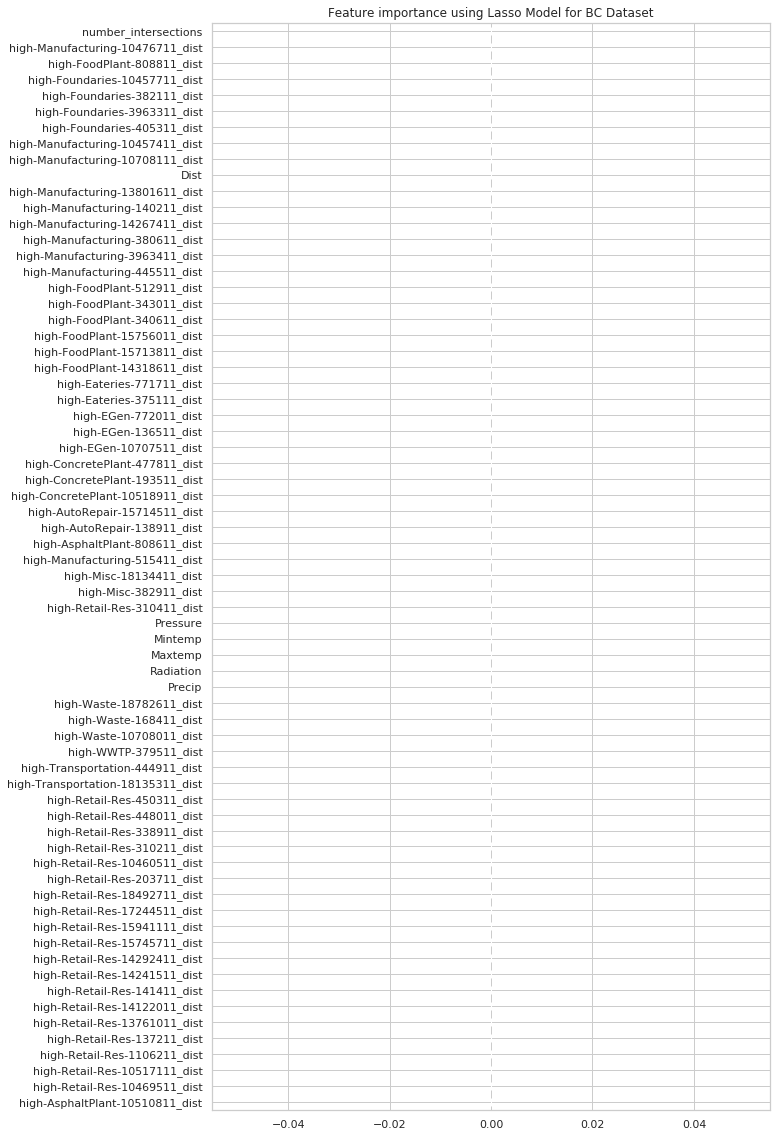

In [123]:
#Display feature importance using Lasso model

#Sort the features
imp_coef = coef_BC.sort_values()

# Plot feature importance in  bar graph
plt.figure(figsize = (10,20))
imp_coef.plot(kind = "barh", color='orange')
plt.title("Feature importance using Lasso Model for BC Dataset")

The model R2 seems to be pretty low and none of the features are selected in this case! Thus, a simple lasso regularization may not be the best method to do feature selection for the BC dataset.

<font size = 4> <b>  NO2 dataset
</b> </font>

In [124]:
# First set up the test-train split
X_train_NO2, X_test_NO2, y_train_NO2, y_test_NO2 = train_test_split(X_NO2_scaled, y_NO2, test_size=0.30, random_state=27)

In [125]:
# Train model with default alpha=1
lasso_NO2 = Lasso(alpha=1).fit(X_train_NO2, y_train_NO2)

# get cross val scores
get_cv_scores(lasso_NO2)

('CV Mean: ', 0.1888239989707043, 'STD: ', 0.006705426321771549)

Using a default value for alpha does not give a cross validation score. We can improve the model performance by using a grid search over different alpha values and determine the best alpha. 

In [126]:
# find optimal alpha with grid search - Manually setting the value of alpha
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Define param_grid
param_grid = dict(alpha=alpha)

#Do a grid search and calculate r2 for each model
grid_NO2 = GridSearchCV(estimator=lasso_NO2, param_grid=param_grid, scoring='r2', verbose=1)

#Fit the training data
grid_result_NO2 = grid_NO2.fit(X_train_NO2, y_train_NO2)

#Calculate best score for training data
print('Best Score: ', grid_result_NO2.best_score_)


#Calculate parameters
print('Best Params: ', grid_result_NO2.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    3.0s finished


Best Score:  0.5766017751876504
Best Params:  {'alpha': 0.001}


# match column names to coefficients
for coef, col in enumerate(X_train_NO2.columns):
    print(f'{col}:  {float(lasso_NO2.coef_[coef])}')

In [127]:
#Estimate model coefficients. Coefficient of zero indicates that feature can be dropped
coef_NO2 = pd.Series(lasso_NO2.coef_, index = NO2_features.columns)

Text(0.5, 1.0, 'Feature importance using Lasso Model for NO2 Dataset')

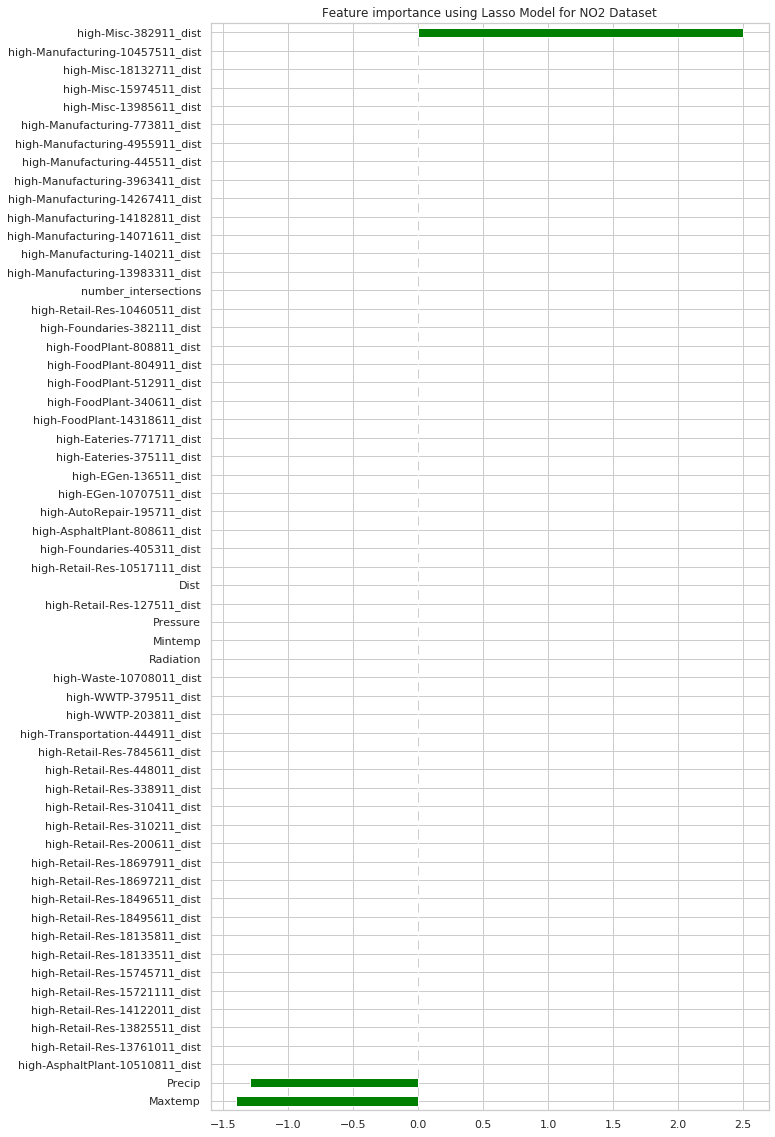

In [128]:
#Display feature importance using Lasso model

#Sort the features
imp_coef = coef_NO2.sort_values()

# Plot feature importance in  bar graph
plt.figure(figsize = (10,20))
imp_coef.plot(kind = "barh", color='green')
plt.title("Feature importance using Lasso Model for NO2 Dataset")

The model R2 is slightly better than the BC model and there are 7 features that don't have a coefficient of zero, indicating that the these features are <b>not</b> ignored by the model. However, the R2 is still low and next we try out feature selection with cross validation.

<b> <font size = 5> Lasso Regularization with Grid Search and Cross-Validation </b> </font>



<font size = 3> Next we perform a 5-fold cross validation to choose the best alpha, refit the model and computer the test error and best model coefficients. We use cross-validation to perform the test-train split because this gives a better indication of how well the model performs on unseen data.  </font>

<b> <font size = 4> Lasso regularization for BC dataset </font> </b>

In [130]:
# Use the cross-validation package to split data into training and test sets
X_train_BC, X_test_BC , y_train_BC, y_test_BC = train_test_split(X_BC_scaled, y_BC, test_size=0.5, random_state=1)

In [132]:
##Instantiate a Lasso Regularization model. Performe a LassoCV using 5-fold cross validation
lassocv_BC = LassoCV(cv=5, alphas= None)

#Fit the model to BC X and y
lassocv_BC.fit(X_train_BC, y_train_BC)


### Set the parameters
lasso_BC.set_params(alpha=lassocv_BC.alpha_)


#Print the optimal valu for alpha that gives the best fit for training data
print("Best Alpha using LassoCV = ", lassocv_BC.alpha_)


#Using this value of alpha to refit the model
lasso_BC.fit(X_train_BC, y_train_BC)

## Computing mean squared error on the test data
print("MSE on test data = ", mean_squared_error(y_test_BC, lasso_BC.predict(X_test_BC)))


## Best score using Lasso CV 
print("Best score using LassoCV: ", lasso_BC.score(X_BC_scaled,y_BC))


#Estimate model coefficients. Coefficient of zero indicates that feature can be dropped
coef_BC = pd.Series(lasso_BC.coef_, index = BC_features.columns)


Best Alpha using LassoCV =  0.00017614112923845318
MSE on test data =  0.17270011230721222
Best score using LassoCV:  0.524324216266828


Text(0.5, 1.0, 'Feature importance using Lasso Model for BC Dataset')

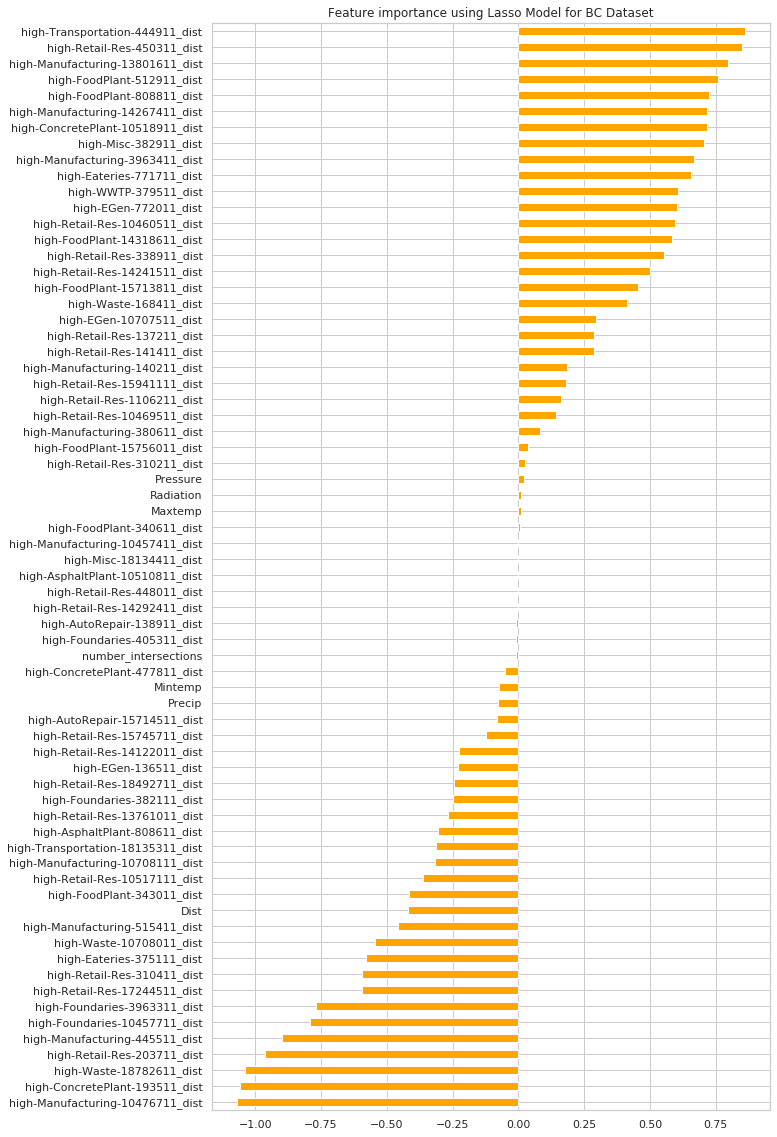

In [133]:
#Display feature importance using Lasso model

#Sort the features
imp_coef = coef_BC.sort_values()

# Plot feature importance in  bar graph
plt.figure(figsize = (10,20))
imp_coef.plot(kind = "barh", color='orange')
plt.title("Feature importance using Lasso Model for BC Dataset")


In [134]:
print("Lasso picked " + str(sum(coef_BC != 0)) + " variables and eliminated the other " +  str(sum(coef_BC == 0)) + " variables")

Lasso picked 63 variables and eliminated the other 5 variables


<b> <font size = 4> Applying VIF scores calculation to the above selected features </b> </font>

In [156]:
output_featurelist = []
i=0
for feature_name in coef_BC.index:
    score = coef_BC[i]
    if score!=0:
        output_featurelist.append("Q('" + feature_name + "')")
    i += 1
output_features_BC_Lasso = ' + '.join(output_featurelist)

In [157]:
output_features_BC_Lasso

"Q('high-AsphaltPlant-808611_dist') + Q('high-AutoRepair-138911_dist') + Q('high-AutoRepair-15714511_dist') + Q('high-ConcretePlant-10518911_dist') + Q('high-ConcretePlant-193511_dist') + Q('high-ConcretePlant-477811_dist') + Q('high-EGen-10707511_dist') + Q('high-EGen-136511_dist') + Q('high-EGen-772011_dist') + Q('high-Eateries-375111_dist') + Q('high-Eateries-771711_dist') + Q('high-FoodPlant-14318611_dist') + Q('high-FoodPlant-15713811_dist') + Q('high-FoodPlant-15756011_dist') + Q('high-FoodPlant-340611_dist') + Q('high-FoodPlant-343011_dist') + Q('high-FoodPlant-512911_dist') + Q('high-FoodPlant-808811_dist') + Q('high-Foundaries-10457711_dist') + Q('high-Foundaries-382111_dist') + Q('high-Foundaries-3963311_dist') + Q('high-Foundaries-405311_dist') + Q('high-Manufacturing-10476711_dist') + Q('high-Manufacturing-10708111_dist') + Q('high-Manufacturing-13801611_dist') + Q('high-Manufacturing-140211_dist') + Q('high-Manufacturing-14267411_dist') + Q('high-Manufacturing-380611_dist'

In [158]:
vif_BC_score_Lasso = []
#  get y and X dataframes based on this regression:
y_BC, X_BC_scaled = dmatrices('BC_Value ~' + output_features_BC_Lasso, BC_clustered, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif_BC_Lasso = pd.DataFrame()
vif_BC_Lasso["VIF Factor"] = [variance_inflation_factor(X_BC_scaled.values, i) for i in range(X_BC_scaled.shape[1])]
vif_BC_Lasso["features"] = X_BC_scaled.columns
vif_BC_score_Lasso.append(vif_BC_Lasso.round(1))


In [159]:
print(vif_BC_score_Lasso)

[      VIF Factor                                features
0   1.125927e+07                               Intercept
1   4.112876e+13      Q('high-AsphaltPlant-808611_dist')
2   1.154769e+14        Q('high-AutoRepair-138911_dist')
3   1.684932e+05      Q('high-AutoRepair-15714511_dist')
4   4.275150e+04   Q('high-ConcretePlant-10518911_dist')
5   1.657854e+05     Q('high-ConcretePlant-193511_dist')
6   2.515977e+13     Q('high-ConcretePlant-477811_dist')
7   7.904214e+09            Q('high-EGen-10707511_dist')
8   6.078170e+05              Q('high-EGen-136511_dist')
9   4.030330e+04              Q('high-EGen-772011_dist')
10  4.630951e+12          Q('high-Eateries-375111_dist')
11  6.889803e+05          Q('high-Eateries-771711_dist')
12  1.403403e+06       Q('high-FoodPlant-14318611_dist')
13  2.928970e+04       Q('high-FoodPlant-15713811_dist')
14  1.014636e+06       Q('high-FoodPlant-15756011_dist')
15  1.128764e+05         Q('high-FoodPlant-340611_dist')
16  1.137163e+05         Q('hi

<b> <font size = 4> Lasso regularization for NO2 dataset </font> </b>

In [160]:
# Use the cross-validation package to split data into training and test sets
X_train_NO2, X_test_NO2 , y_train_NO2, y_test_NO2 = train_test_split(X_NO2_scaled, y_NO2, test_size=0.5, random_state=27)

In [161]:
##Instantiate a Lasso Regularization model. Performe a LassoCV using 5-fold cross validation
lassocv_NO2 = LassoCV(cv=5, alphas= None)

#Fit the model to BC X and y
lassocv_NO2.fit(X_train_NO2, y_train_NO2)


### Set the parameters
lasso_NO2.set_params(alpha=lassocv_NO2.alpha_)


#Print the optimal valu for alpha that gives the best fit for training data
print("Best Alpha using LassoCV = ", lassocv_NO2.alpha_)


#Using this value of alpha to refit the model
lasso_NO2.fit(X_train_NO2, y_train_NO2)

## Computing mean squared error on the test data
print("MSE on test data = ", mean_squared_error(y_test_NO2, lasso_NO2.predict(X_test_NO2)))


## Best score using Lasso CV 
print("Best score using LassoCV: ", lasso_NO2.score(X_NO2_scaled,y_NO2))


#Estimate model coefficients. Coefficient of zero indicates that feature can be dropped
coef_NO2 = pd.Series(lasso_NO2.coef_, index = X_NO2.columns)


Best Alpha using LassoCV =  0.003567295197228768
MSE on test data =  40.13174598296768
Best score using LassoCV:  0.5694186452567079


Text(0.5, 1.0, 'Feature importance using Lasso Model for NO2 Dataset')

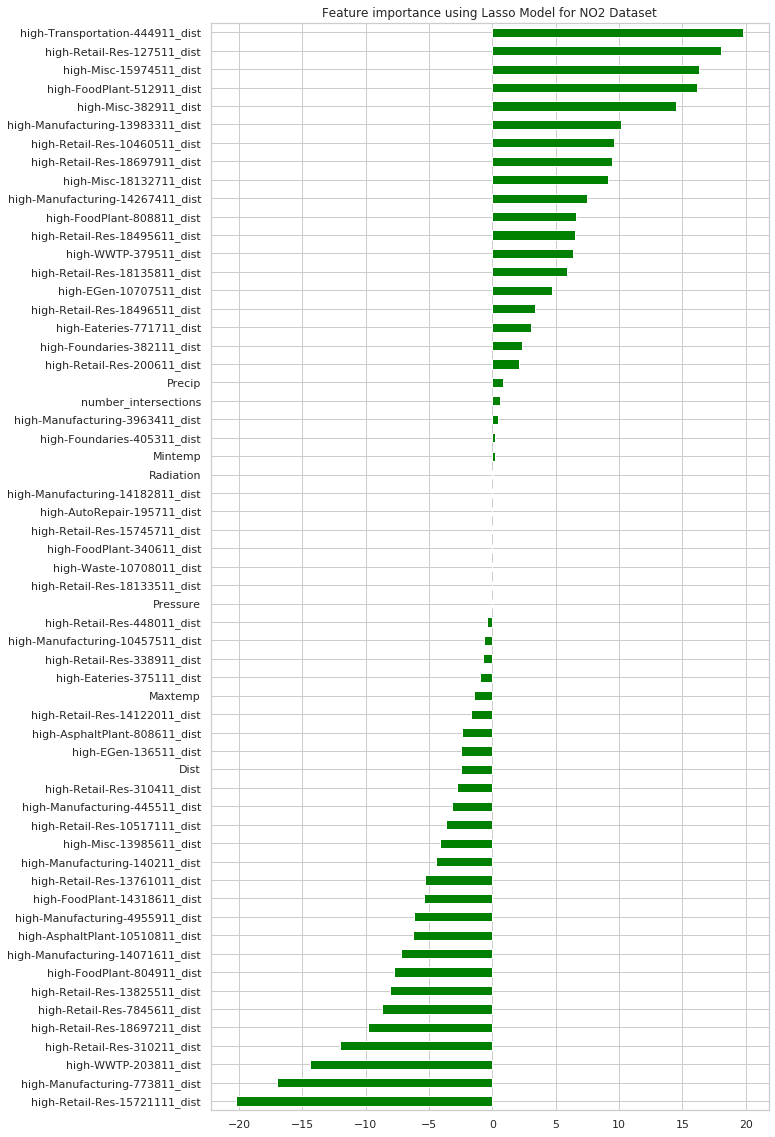

In [162]:
#Display feature importance using Lasso model

#Sort the features
imp_coef = coef_NO2.sort_values()

# Plot feature importance in  bar graph
plt.figure(figsize = (10,20))
imp_coef.plot(kind = "barh", color='green')
plt.title("Feature importance using Lasso Model for NO2 Dataset")


In [163]:
print("Lasso picked " + str(sum(coef_NO2 != 0)) + " variables and eliminated the other " +  str(sum(coef_NO2 == 0)) + " variables")

Lasso picked 53 variables and eliminated the other 6 variables


<b> <font size = 4> Applying VIF scores calculation to the above selected features </b> </font>

In [164]:
output_featurelist = []
i=0
for feature_name in coef_NO2.index:
    score = coef_NO2[i]
    if score!=0:
        output_featurelist.append("Q('" + feature_name + "')")
    i += 1
output_features_NO2_Lasso = ' + '.join(output_featurelist)

In [166]:
vif_NO2_score_Lasso = []
#  get y and X dataframes based on this regression:
y_NO2, X_NO2_scaled = dmatrices('NO2_Value ~' + output_features_NO2_Lasso, NO2_clustered, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif_NO2_Lasso = pd.DataFrame()
vif_NO2_Lasso["VIF Factor"] = [variance_inflation_factor(X_NO2_scaled.values, i) for i in range(X_NO2_scaled.shape[1])]
vif_NO2_Lasso["features"] = X_NO2_scaled.columns
vif_NO2_score_Lasso.append(vif_NO2_Lasso.round(1))


In [167]:
print(vif_NO2_score_Lasso)

[      VIF Factor                               features
0   3.279658e+06                              Intercept
1   3.364610e+05   Q('high-AsphaltPlant-10510811_dist')
2   2.058553e+11     Q('high-AsphaltPlant-808611_dist')
3   5.134999e+10           Q('high-EGen-10707511_dist')
4   1.435869e+05             Q('high-EGen-136511_dist')
5   8.213751e+10         Q('high-Eateries-375111_dist')
6   1.420204e+05         Q('high-Eateries-771711_dist')
7   5.552730e+05      Q('high-FoodPlant-14318611_dist')
8   9.086581e+05        Q('high-FoodPlant-512911_dist')
9   1.051045e+06        Q('high-FoodPlant-804911_dist')
10  6.201010e+04        Q('high-FoodPlant-808811_dist')
11  4.830740e+04       Q('high-Foundaries-382111_dist')
12  3.055224e+08       Q('high-Foundaries-405311_dist')
13  7.445330e+04  Q('high-Manufacturing-10457511_dist')
14  8.752700e+03  Q('high-Manufacturing-13983311_dist')
15  1.634111e+05    Q('high-Manufacturing-140211_dist')
16  2.156218e+08  Q('high-Manufacturing-1407161

<b> <font size = 5> Test 7: Step Forward Approach with VIF Scores calculations </b> </font>

<b> <font size = 3> BC Dataset </b> </font>

The approach here is to keep adding features sequentially, and calculate the VIF score with addition of each feature. If the VIF score of any of the features increases above threshold of 10, then we drop the newly added feature. 

In [7]:
#Create the dataframe
X_BC = BC_features
X_BC_scaled = pd.DataFrame(StandardScaler().fit_transform(X_BC),columns = X_BC.columns)
y_BC = BC_clustered['BC_Value']

In [9]:
#Update column name for X_BC and Y_BC to be of format Q('Column Name')
output_featurelist_BC = []

for feature_name in X_BC.columns:
    output_featurelist_BC.append("Q('" + feature_name + "')")
output_features_BC = ' + '.join(output_featurelist_BC)

#### Create a dataframe to calculate VIF scores y_BC and x_BC with all the features in BC_clustered

In [54]:
#  get y and X dataframes based on this regression:
y_BC_vif, X_BC_vif = dmatrices('BC_Value ~' + output_features_BC, BC_clustered, return_type='dataframe')


In [92]:
#output_featurelist = []
vif_score = []
vif_BC = pd.DataFrame()

def calculate_vif_BC(x):
    thresh = 10
    output = pd.DataFrame()
    output_featurelist = []
    k = x.shape[1]
    for i in range(1,k):
        output_featurelist.append(x.columns[i])
        #random.shuffle(output_featurelist)
        output_features = ' + '.join(output_featurelist)
        y_BC, X_BC = dmatrices('BC_Value ~' + output_features, BC_clustered, return_type='dataframe')
        

        # For each X, calculate VIF and save in dataframe
        vif = [variance_inflation_factor(X_BC.values, j) for j in range(X_BC.shape[1])]
        shouldDropFeature = False
        for j in range(len(vif)):
            if vif[j] > thresh:
                shouldDropFeature = True
        
        if shouldDropFeature:
            # Drop latest feature if VIF is > 10 for any feature after adding latest feature
            output_featurelist = output_featurelist[:-1]
            
    # Create final feature list    
    final_output_featurelist = output_featurelist
    final_output_features = ' + '.join(final_output_featurelist)

    
    #Recalculate X and Y for final feature list
    y_BC, X_BC = dmatrices('BC_Value ~' + final_output_features, BC_clustered, return_type='dataframe')
    
    #Estimate VIF score for final feature list
    vif_BC["VIF Factor"] = [variance_inflation_factor(X_BC.values, i) for i in range(X_BC.shape[1])]
    vif_BC["features"] = X_BC.columns

    
    BC_ols_model = sm.OLS(y_BC, X_BC)
    BC_ols_results = BC_ols_model.fit()
    return vif_BC, BC_ols_results.summary()

        

In [93]:
calculate_vif_BC(X_BC_vif)

(   VIF Factor                              features
 0    9.110628                             Intercept
 1    1.456621                       Q('Unnamed: 0')
 2    1.314496  Q('high-AsphaltPlant-10510811_dist')
 3    2.074313    Q('high-AsphaltPlant-808611_dist')
 4    1.289167             Q('number_intersections'),
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:               BC_Value   R-squared:                       0.270
 Model:                            OLS   Adj. R-squared:                  0.270
 Method:                 Least Squares   F-statistic:                     1988.
 Date:                Sat, 30 May 2020   Prob (F-statistic):               0.00
 Time:                        13:37:38   Log-Likelihood:                -16326.
 No. Observations:               21488   AIC:                         3.266e+04
 Df Residuals:                   21483   BIC:                         3

print(plt.get_backend())

#close any existing plots
plt.close("all")

#mask out the top triangle
VIF_BC_corr_arr[np.triu_indices_from(VIF_BC_corr_arr)] = np.nan

fig, ax = plt.subplots(figsize=(10, 10))

hm = sns.heatmap(VIF_BC_corr_arr, cbar=True, vmin = -1, vmax = 1, center = 0,
                 fmt='.2f', annot_kws={'size': 8}, annot=True, 
                 square=False, cmap = 'coolwarm')
#cmap=plt.cm.Blues

ticks = np.arange(VIF_BC_corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(VIF_BC_corr.columns, rotation=90, fontsize=15)
ax.set_yticks(ticks)
ax.set_yticklabels(VIF_BC_corr.index, rotation=360, fontsize=15)

ax.set_title('Correlation Matrix - Black Carbon  - VIF', fontsize  = 20)
plt.tight_layout()
#plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

<b> <font size = 3> NO2 Dataset </b> </font>

In [61]:
#Create the dataframe
X_NO2 = NO2_features
y_NO2 = NO2_clustered['NO2_Value']

In [62]:
#Update column name for X_BC and Y_BC to be of format Q('Column Name')
output_featurelist_NO2 = []

for feature_name in X_NO2.columns:
    output_featurelist_NO2.append("Q('" + feature_name + "')")
output_features_NO2 = ' + '.join(output_featurelist_NO2)

In [63]:
#  get y and X dataframes based on this regression:
y_NO2_vif, X_NO2_vif = dmatrices('NO2_Value ~' + output_features_NO2, NO2_clustered, return_type='dataframe')


In [90]:
#output_featurelist = []
vif_score = []
vif_NO2 = pd.DataFrame()

def calculate_vif_NO2(x):
    thresh = 10
    output = pd.DataFrame()
    output_featurelist = []
    k = x.shape[1]
    for i in range(1,k):
        output_featurelist.append(x.columns[i])
        #random.shuffle(output_featurelist)
        output_features = ' + '.join(output_featurelist)
        y_NO2, X_NO2 = dmatrices('NO2_Value ~' + output_features, NO2_clustered, return_type='dataframe')
        

        # For each X, calculate VIF and save in dataframe
        vif = [variance_inflation_factor(X_NO2.values, j) for j in range(X_NO2.shape[1])]
        shouldDropFeature = False
        for j in range(len(vif)):
            if vif[j] > thresh:
                shouldDropFeature = True
        
        if shouldDropFeature:
            # Drop latest feature if VIF is > 10 for any feature after adding latest feature
            output_featurelist = output_featurelist[:-1]
            
    # Create final feature list    
    final_output_featurelist = output_featurelist
    final_output_features = ' + '.join(final_output_featurelist)
    
    #Recalculate X and Y for final feature list
    y_NO2, X_NO2 = dmatrices('NO2_Value ~' + final_output_features, NO2_clustered, return_type='dataframe')
    
    #Estimate VIF score for final feature list
    vif_NO2["VIF Factor"] = [variance_inflation_factor(X_NO2.values, i) for i in range(X_NO2.shape[1])]
    vif_NO2["features"] = X_NO2.columns
    
    NO2_ols_model = sm.OLS(y_NO2, X_NO2)
    NO2_ols_results = NO2_ols_model.fit()
    return vif_NO2, NO2_ols_results.summary()

        

In [91]:
calculate_vif_NO2(X_NO2_vif)

(   VIF Factor                              features
 0    9.110628                             Intercept
 1    1.456621                       Q('Unnamed: 0')
 2    1.314496  Q('high-AsphaltPlant-10510811_dist')
 3    2.074313    Q('high-AsphaltPlant-808611_dist')
 4    1.289167             Q('number_intersections'),
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              NO2_Value   R-squared:                       0.328
 Model:                            OLS   Adj. R-squared:                  0.328
 Method:                 Least Squares   F-statistic:                     2626.
 Date:                Sat, 30 May 2020   Prob (F-statistic):               0.00
 Time:                        13:37:18   Log-Likelihood:                -75033.
 No. Observations:               21488   AIC:                         1.501e+05
 Df Residuals:                   21483   BIC:                         1

#len(X_BC.columns)
scores = []
sfs_features = []
vif_features = []
for i in range (1,30):
    sfs = SFS(LinearRegression(),
           k_features=i,
           forward=True,
           floating=False,
           scoring = 'neg_mean_squared_error',
           cv = 5,
           n_jobs = -1)
    sfs.fit(X_BC, y_BC)
    scores.append(sfs.k_score_)
    sfs_features.append(sfs.k_feature_names_)
    
  

output_featurelist = []
for featurelist in (sfs_features):
    output_features = []
    for feature in featurelist:
        output_features.append("Q('"   + feature + "')")
    output_features_string = ' + '.join(output_features)
    output_featurelist.append(output_features_string)
    
output_featurelist

vif_BC_score = []
for features in output_featurelist:
    # get y and X dataframes based on this regression:
    y_BC, X_BC = dmatrices('BC_Value ~' + features, BC, return_type='dataframe')
    # For each X, calculate VIF and save in dataframe
    vif_BC = pd.DataFrame()
    vif_BC["VIF Factor"] = [variance_inflation_factor(X_BC.values, i) for i in range(X_BC.shape[1])]
    vif_BC["features"] = X_BC.columns
    vif_BC_score.append(vif_BC.round(1))



vif_BC_score

# Identify the models with top 10 scores i.e. highest negative mean squared error values.

max_score_BC = sorted(scores)[-5:]

max_score_BC

for i,score in enumerate(scores):
    if (score in max_score_BC):
        print("Score == " + str(score))
        print(vif_BC_score[i])
        print('****************************************************************')
              
        
    

vif_BC_score[1]

In [ ]:
VIF BC Score

In [ ]:
#output_featurelist = []
vif_score = []
vif_BC = pd.DataFrame()


## In this function, you pass the features, feature_df in the format Q(' ') and the entire dataframe with scaled values
def calculate_vif_BC(feature_df,df):
    thresh = 10
    output = pd.DataFrame()
    output_featurelist = []
    max_R2 = 0
    k = feature_df.shape[1]
    first_feature = None
    for column in df.columns[1:]:
        r2 = sm.OLS(df['BC_Value'], df[column]).fit().rsquared
        if r2 > max_R2:
            max_R2 = r2
            first_feature = column
    output_featurelist.append("Q('" + first_feature + "')")
        
    for i in range(1,k):
        if (df.columns[i] == first_feature):
            continue
        
        output_featurelist.append(feature_df.columns[i]) # Start with the first column we identified before, and append the next column with every iteration
        output_features = ' + '.join(output_featurelist)
        y_BC, X_BC = dmatrices('BC_Value ~' + output_features, df, return_type='dataframe') #Create matrix each time a column is appended

        #Calculate the model R2 for the newly added feature
        BC_ols_model = sm.OLS(y_BC, X_BC)
        BC_ols_results = BC_ols_model.fit()
        #print("R2: ", BC_ols_results.rsquared)
        #print("i:", i)

        #Set should drop feature as False initially
        shouldDropFeature = False

        #Check if R2 for the new model is greater than the max_R2
        if BC_ols_results.rsquared > max_R2:
            max_R2 = BC_ols_results.rsquared

            # For each X, calculate VIF and save in dataframe
            vif = [variance_inflation_factor(X_BC.values, j) for j in range(X_BC.shape[1])] #Calculate VIF score for each model

            if np.amax(vif) > thresh:    
                shouldDropFeature = True
        else:
            shouldDropFeature = True

        #print(output_featurelist)
        if shouldDropFeature:
            # Drop latest feature if VIF is > 10 OR r^2 < max r^2 for any feature after adding latest feature
            output_featurelist = output_featurelist[:-1]
            #print(output_featurelist)
            
    # Create final feature list    
    final_output_featurelist = output_featurelist
    final_output_features = ' + '.join(final_output_featurelist)

    
    #Recalculate X and Y for final feature list
    y_BC, X_BC = dmatrices('BC_Value ~' + final_output_features, df, return_type='dataframe')
    
    #Estimate VIF score for final feature list
    vif_BC["VIF Factor"] = [variance_inflation_factor(X_BC.values, i) for i in range(X_BC.shape[1])]
    vif_BC["features"] = X_BC.columns

    #Fit an OLS model for the final features that are selected and return summary statistics, VIF scores (This has to happen prior to VIF check)
    BC_ols_model = sm.OLS(y_BC, X_BC)
    BC_ols_results = BC_ols_model.fit()
    return vif_BC, BC_ols_results.summary()

        

In [ ]:
#Create a dataframe with the features that were selected from VIF for BC
VIF_BC_df = BC[['BC_Value']].join(BC[['high-Retail-Res-14122011_dist', 'high-FoodPlant-14318611_dist', 'high-FoodPlant-15713811_dist']])

In [ ]:
VIF_NO2_Score

In [ ]:
#output_featurelist = []
vif_score = []
vif_NO2 = pd.DataFrame()


## In this function, you pass the features, feature_df in the format Q(' ') and the entire dataframe with scaled values
def calculate_vif_NO2(feature_df,df):
    thresh = 30
    output = pd.DataFrame()
    output_featurelist = []
    max_R2 = 0
    k = feature_df.shape[1]
    first_feature = None
    for column in df.columns[1:]:
        r2 = sm.OLS(df['NO2_Value'], df[column]).fit().rsquared
        if r2 > max_R2:
            max_R2 = r2
            first_feature = column
    output_featurelist.append("Q('" + first_feature + "')")
    print(output_featurelist)
        
    for i in range(1,k):
        if (df.columns[i] == first_feature):
            continue

        output_featurelist.append(feature_df.columns[i]) # Start with the first column we identified before, and append the next column with every iteration
        output_features = ' + '.join(output_featurelist)
        y_NO2, X_NO2 = dmatrices('NO2_Value ~' + output_features, df, return_type='dataframe') #Create matrix each time a column is appended

        #Calculate the model R2 for the newly added feature
        NO2_ols_model = sm.OLS(y_NO2, X_NO2)
        NO2_ols_results = NO2_ols_model.fit()
        print("R2: ", NO2_ols_results.rsquared)
        print("i:", i)

        #Set should drop feature as False initially
        shouldDropFeature = False

        #Check if R2 for the new model is greater than the max_R2
        if NO2_ols_results.rsquared > max_R2:
            max_R2 = NO2_ols_results.rsquared

            # For each X, calculate VIF and save in dataframe
            vif = [variance_inflation_factor(X_NO2.values, j) for j in range(X_NO2.shape[1])] #Calculate VIF score for each model
            print(vif)
            if np.amax(vif) > thresh:    
                shouldDropFeature = True
        else:
            shouldDropFeature = True

        #print(output_featurelist)
        if shouldDropFeature:
            # Drop latest feature if VIF is > 10 OR r^2 < max r^2 for any feature after adding latest feature
            output_featurelist = output_featurelist[:-1]
            #print(output_featurelist)
            
    # Create final feature list    
    final_output_featurelist = output_featurelist
    final_output_features = ' + '.join(final_output_featurelist)

    
    #Recalculate X and Y for final feature list
    y_NO2, X_NO2 = dmatrices('NO2_Value ~' + final_output_features, df, return_type='dataframe')
    
    #Estimate VIF score for final feature list
    vif_NO2["VIF Factor"] = [variance_inflation_factor(X_NO2.values, i) for i in range(X_NO2.shape[1])]
    vif_NO2["features"] = X_NO2.columns

    #Fit an OLS model for the final features that are selected and return summary statistics, VIF scores (This has to happen prior to VIF check)
    NO2_ols_model = sm.OLS(y_NO2, X_NO2)
    NO2_ols_results = NO2_ols_model.fit()
    return vif_NO2, NO2_ols_results.summary()

        

In [ ]:
#Create a dataframe with the features that were selected from VIF for BC
VIF_NO2_df = NO2[['NO2_Value']].join(NO2[['high-AsphaltPlant-10510811_dist', 'high-AsphaltPlant-808611_dist', 'Precip','Radiation','Mintemp']])

<b> <font size  = 5> Random Forest for feature selection using entire dataset split and test and training data </font> </b>

<b><font size = 4> BC Dataset </font></b>

**Feature selection using training data**

In [22]:
y_BC_original = BC[['BC_Value']]
X_BC_original = BC.drop(columns = 'BC_Value')

In [23]:
## Test Train split 
X_BC_original_train, X_BC_original_test, y_BC_original_train, y_BC_original_test = train_test_split(X_BC_original, y_BC_original, test_size = 0.3, random_state = 0)  

In [24]:
#Create random forest regressor object
RFRegressor = RandomForestRegressor(random_state = 0, n_estimators = 100, n_jobs = -1, max_features = 'auto')


# fit the model
RFRegressor.fit(X_BC_original, y_BC_original)

# get importance
importance = RFRegressor.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

    
#Create a dataframe
BC_train_feature_importance= pd.DataFrame({'feature': X_BC_original_train.columns, 'importance': importance})


Feature: 0, Score: 0.00195
Feature: 1, Score: 0.00187
Feature: 2, Score: 0.01216
Feature: 3, Score: 0.00489
Feature: 4, Score: 0.01043
Feature: 5, Score: 0.08061
Feature: 6, Score: 0.04247
Feature: 7, Score: 0.01815
Feature: 8, Score: 0.03435
Feature: 9, Score: 0.00853
Feature: 10, Score: 0.00213
Feature: 11, Score: 0.00256
Feature: 12, Score: 0.02184
Feature: 13, Score: 0.00658
Feature: 14, Score: 0.01907
Feature: 15, Score: 0.00445
Feature: 16, Score: 0.00536
Feature: 17, Score: 0.00567
Feature: 18, Score: 0.00888
Feature: 19, Score: 0.00408
Feature: 20, Score: 0.00502
Feature: 21, Score: 0.00191
Feature: 22, Score: 0.00218
Feature: 23, Score: 0.00301
Feature: 24, Score: 0.11538
Feature: 25, Score: 0.00277
Feature: 26, Score: 0.00554
Feature: 27, Score: 0.00299
Feature: 28, Score: 0.00833
Feature: 29, Score: 0.00576
Feature: 30, Score: 0.00385
Feature: 31, Score: 0.01108
Feature: 32, Score: 0.00418
Feature: 33, Score: 0.01916
Feature: 34, Score: 0.01106
Feature: 35, Score: 0.00589
Fe

In [25]:
## Assign groupings to dataframe
BC_train_feature_importance['grouping'] = " "
for index, str in enumerate(BC_train_feature_importance['feature']):
    group = re.findall(r'high-(.+?)-',str)
    if group:
        BC_train_feature_importance.loc[index, 'grouping'] = group
    else:
        BC_train_feature_importance.loc[index, 'grouping'] =  BC_train_feature_importance.loc[index, 'feature']



In [26]:
BC_train_feature_importance = BC_train_feature_importance.sort_values(['importance'], ascending = False)

In [27]:
BC_train_feature_importance.loc[:35]

,feature,importance,grouping
24,high-Manufacturing-10476711_dist,0.115379,Manufacturing
5,high-ConcretePlant-193511_dist,0.080608,ConcretePlant
63,Maxtemp,0.063635,Maxtemp
37,high-Retail-Res-10517111_dist,0.061315,Retail
41,high-Retail-Res-14122011_dist,0.052257,Retail
66,Dist,0.049253,Dist
6,high-ConcretePlant-477811_dist,0.042470,ConcretePlant
53,high-Retail-Res-448011_dist,0.039555,Retail
8,high-EGen-136511_dist,0.034348,EGen
50,high-Retail-Res-310211_dist,0.030797,Retail


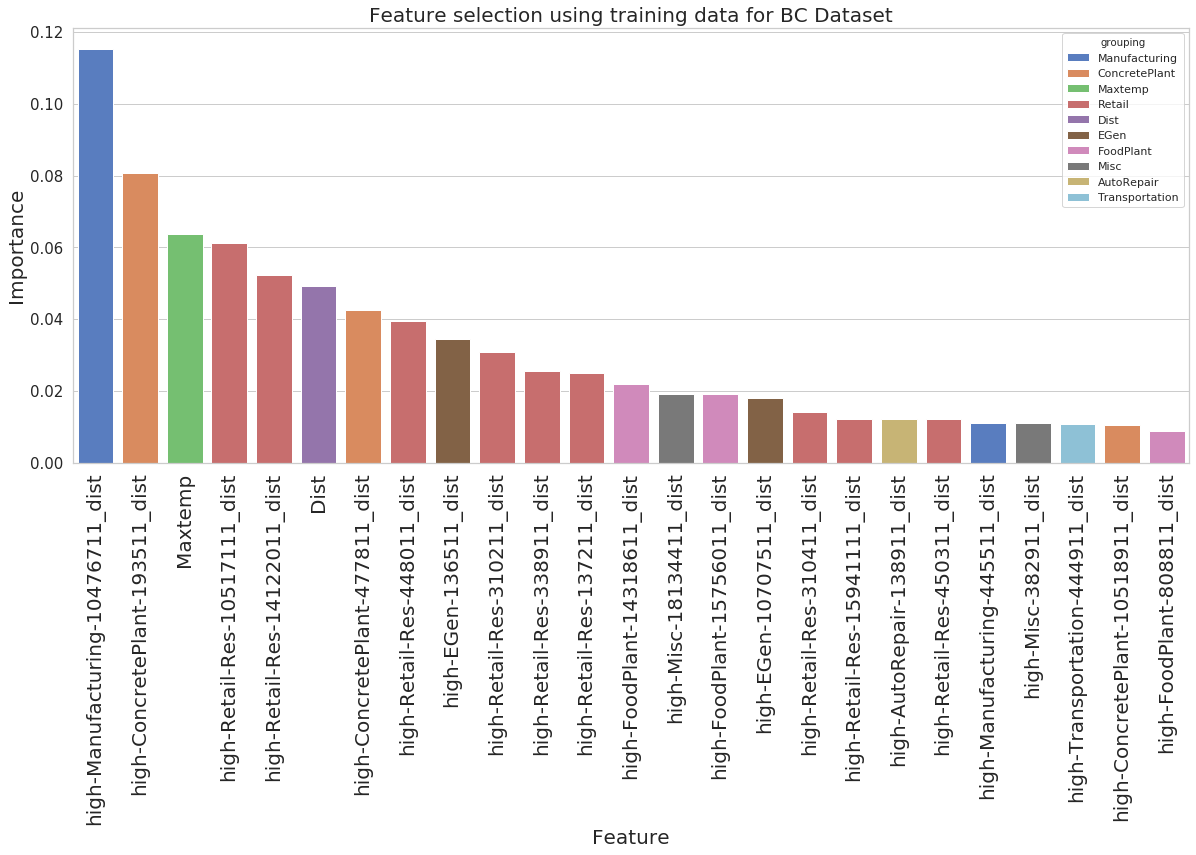

In [28]:
#plot feature importance
plt.figure(figsize = (20,8))
ax = sns.barplot(y = 'importance', x = 'feature', hue = 'grouping',  data = BC_train_feature_importance[:25], 
             dodge = False, palette = 'muted')
plt.xticks(rotation = 90)
plt.xlabel("Feature", size = 20)
plt.xticks(size = 20, rotation = 90)
plt.yticks(size = 15)
plt.ylabel("Importance", size = 20)
plt.title("Feature selection using training data for BC Dataset", size = 20)
plt.show()
#order=BC_train_feature_importance.sort_values('importance',ascending = False).feature

**Feature selection using test data**

In [29]:
#Create random forest regressor object
RFRegressor = RandomForestRegressor(random_state = 0, n_estimators = 100, n_jobs = -1, max_features = 'auto')


# fit the model
RFRegressor.fit(X_BC_original_test, y_BC_original_test)

# get importance
importance = RFRegressor.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

    
#Create a dataframe
BC_test_feature_importance= pd.DataFrame({'feature': X_BC_original_test.columns, 'importance': importance})


Feature: 0, Score: 0.00244
Feature: 1, Score: 0.01592
Feature: 2, Score: 0.00220
Feature: 3, Score: 0.00408
Feature: 4, Score: 0.00811
Feature: 5, Score: 0.08189
Feature: 6, Score: 0.00958
Feature: 7, Score: 0.01324
Feature: 8, Score: 0.03508
Feature: 9, Score: 0.00634
Feature: 10, Score: 0.02835
Feature: 11, Score: 0.00319
Feature: 12, Score: 0.01454
Feature: 13, Score: 0.00789
Feature: 14, Score: 0.01725
Feature: 15, Score: 0.00449
Feature: 16, Score: 0.00586
Feature: 17, Score: 0.00484
Feature: 18, Score: 0.00392
Feature: 19, Score: 0.00411
Feature: 20, Score: 0.00748
Feature: 21, Score: 0.01234
Feature: 22, Score: 0.02416
Feature: 23, Score: 0.02451
Feature: 24, Score: 0.13313
Feature: 25, Score: 0.00307
Feature: 26, Score: 0.00701
Feature: 27, Score: 0.00362
Feature: 28, Score: 0.00672
Feature: 29, Score: 0.00680
Feature: 30, Score: 0.00384
Feature: 31, Score: 0.01523
Feature: 32, Score: 0.00486
Feature: 33, Score: 0.00327
Feature: 34, Score: 0.00727
Feature: 35, Score: 0.02017
Fe

In [30]:
## Assign groupings to dataframe
BC_test_feature_importance['grouping'] = ""
for index, s in enumerate(BC_test_feature_importance['feature']):
    group = re.findall(r'high-(.+?)-',s)
    if group:
        BC_test_feature_importance.loc[index, 'grouping'] = group
    else:
        BC_test_feature_importance.loc[index, 'grouping'] =  BC_test_feature_importance.loc[index, 'feature']

# ### Assign colors to different groups
# BC_test_feature_importance['color'] = ""
# for index, s in enumerate(BC_test_feature_importance['grouping']):
#     if s == 'Manufacturing': 
#         BC_test_feature_importance['color'] = 'Red'
#     elif s == 'ConcretePlant':
#         BC_test_feature_importance['color'] = 'LightGreen'
#     elif s == 'Maxtemp':
#         BC_test_feature_importance['color'] = 'LightBlue'
#     elif s == 'Dist':
#         BC_test_feature_importance['color'] = 'LightPink'
#     elif s =='Retail':
#         BC_test_feature_importance['color'] = 'Grey'
#     elif s == 'EGen':
#         BC_test_feature_importance['color'] = 'Orange'
#     elif s == 'Eateries':
#         BC_test_feature_importance['color'] = 'Brown'
        

In [31]:
BC_test_feature_importance = BC_test_feature_importance.sort_values(['importance'], ascending = False)

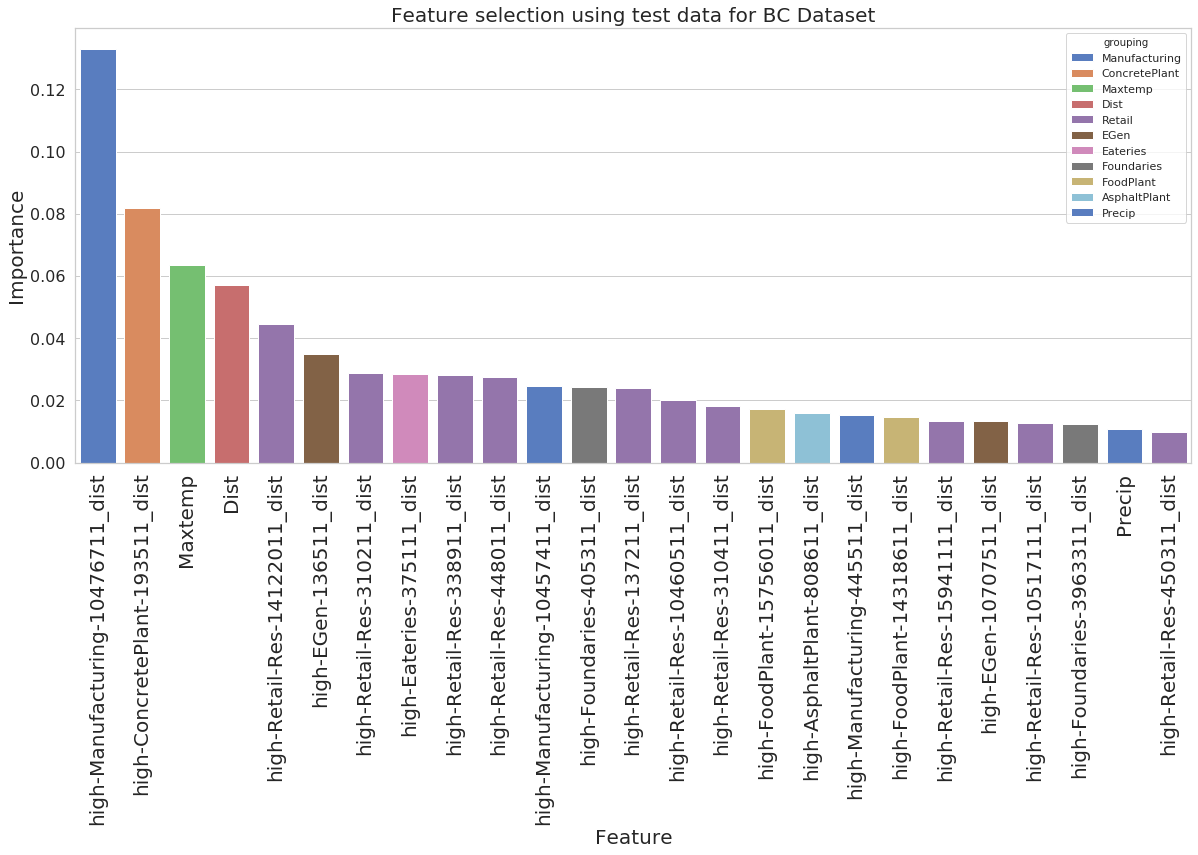

In [32]:
#plot feature importance
plt.figure(figsize = (20,8))
ax = sns.barplot(y = 'importance', x = 'feature', hue = 'grouping',  data = BC_test_feature_importance[:25], 
             dodge = False, palette = 'muted')
plt.xticks(rotation = 90)
plt.xlabel("Feature", size = 20)
plt.xticks(size = 20)
plt.yticks(size = 16)
plt.ylabel("Importance", size = 20)
plt.title("Feature selection using test data for BC Dataset", size = 20)
plt.show()
#order=BC_test_feature_importance.sort_values('importance',ascending = False).feature

#Create a Scaler object
sc = StandardScaler()

#Instantiate PCA
pca = PCA()

#Create random forest regressor object
RFRegressor = RandomForestRegressor(random_state = 0, n_estimators = 50, n_jobs = -1, max_features = 'auto')

#Create a pipeline of three steps. First, standardize the data.
#Second, transform the training data with PCA.
#Third, train a Random Forest Regressor on the training data.
pipe = Pipeline(steps=[('sc', sc),
                       ('pca', pca),
                       ('RFRegressor', RFRegressor)])


#Create Parameter Space
#Create a list of a sequence of integers from 1 to 68 (the number of features in X + 1)
n_components = list(range(1,X_train_BC_PCA.shape[1]+1,1))


#Create lists of parameter for Random Forest Regressor. Here we use mse as the criterion
#Number of trees in random forest
n_estimators = [50, 100, 200, 400]
#Maximum number of levels in tree
max_depth = [10,15, 20, 25]
#Method of selecting samples for training each tree
bootstrap = [True, False]

#Create a dictionary of all the parameter options 

parameters = dict(pca__n_components=n_components,
                RFRegressor__max_depth=max_depth,
                RFRegressor__n_estimators=n_estimators)


#Conduct Parameter Optmization With Pipeline
#Create a grid search object
clf = GridSearchCV(pipe, parameters)


#Fit the grid search on training data
clf.fit(X_train_BC_PCA, y_train_BC_PCA)

#View The Best Parameters
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
print(); print(clf.best_estimator_.get_params()['RFRegressor'])


#Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf, X_test_BC_PCA, y_test_BC_PCA, cv=5, n_jobs=-1, scoring='r2')
print("CV Result for each set: ", CV_Result)
print("Mean CV result for PCA and Random Forest Model: ", CV_Result.mean())


##Make predictions based on fitted model
y_pred_BC_PCA_test = clf.predict(X_test_BC_PCA)
y_pred_BC_PCA = clf.predict(X_BC_original)


###Print the components and explained variance
#clf.best_estimator_.named_steps['pca'].components_
print(clf.best_estimator_.named_steps['pca'].explained_variance_ratio_)

<b><font size = 4> NO2 Dataset </font></b>

**Feature selection using training data**

In [ ]:
#Create random forest regressor object
RFRegressor = RandomForestRegressor(random_state = 0, n_estimators = 100, n_jobs = -1, max_features = 'auto')


# fit the model
RFRegressor.fit(X_NO2_original_train, y_NO2_original_train)

# get importance
importance = RFRegressor.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

    
#Create a dataframe
NO2_train_feature_importance= pd.DataFrame({'feature': X_NO2_original_train.columns, 'importance': importance})


In [ ]:
## Assign groupings to dataframe
NO2_train_feature_importance['grouping'] = ""
for index, str in enumerate(NO2_train_feature_importance['feature']):
    group = re.findall(r'high-(.+?)-',str)
    if group:
        NO2_train_feature_importance.loc[index, 'grouping'] = group
    else:
        NO2_train_feature_importance.loc[index, 'grouping'] = NO2_train_feature_importance.loc[index, 'feature']
        



In [ ]:
NO2_train_feature_importance = NO2_train_feature_importance.sort_values(['importance'], ascending = False)

In [ ]:
#plot feature importance
plt.figure(figsize = (20,8))
ax = sns.barplot(y = 'importance', x = 'feature', hue = 'grouping',  data = NO2_train_feature_importance[:25], 
             dodge = False, palette = 'muted')
plt.xticks(rotation = 90)
plt.xlabel("Feature", size = 20)
plt.xticks(size = 20)
plt.yticks(size = 16)
plt.ylabel("Importance", size = 20)
plt.title("Feature selection using training data for NO2 Dataset", size = 20)
plt.show()
#order=NO2_train_feature_importance.sort_values('importance',ascending = False).feature

**Feature selection using test data**

In [ ]:
#Create random forest regressor object
RFRegressor = RandomForestRegressor(random_state = 0, n_estimators = 100, n_jobs = -1, max_features = 'auto')


# fit the model
RFRegressor.fit(X_NO2_original_test, y_NO2_original_test)

# get importance
importance = RFRegressor.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

    
#Create a dataframe
NO2_test_feature_importance= pd.DataFrame({'feature': X_NO2_original_test.columns, 'importance': importance})


In [ ]:
## Assign groupings to dataframe
NO2_test_feature_importance['grouping'] = ""
for index, str in enumerate(NO2_test_feature_importance['feature']):
    group = re.findall(r'high-(.+?)-',str)
    if group:
        NO2_test_feature_importance.loc[index, 'grouping'] = group
    else:
        NO2_test_feature_importance.loc[index, 'grouping'] = NO2_test_feature_importance.loc[index, 'feature']
        



In [ ]:
NO2_test_feature_importance = NO2_test_feature_importance.sort_values(['importance'], ascending = False)

In [ ]:
#plot feature importance
plt.figure(figsize = (20,8))
ax = sns.barplot(y = 'importance', x = 'feature', hue = 'grouping',  data = NO2_test_feature_importance[:25], 
             dodge = False, palette = 'muted')
plt.xticks(rotation = 90)
plt.xlabel("Feature", size = 20)
plt.xticks(size = 20)
plt.yticks(size = 16)
plt.ylabel("Importance", size = 20)
plt.title("Feature selection using test data for NO2 Dataset", size = 20)
plt.show()
#order=NO2_train_feature_importance.sort_values('importance',ascending = False).feature

In [ ]:
#Create a Scaler object
sc = StandardScaler()

#Instantiate PCA
pca = PCA()

#Create random forest regressor object
RFRegressor = RandomForestRegressor(random_state = 0, n_estimators = 50, n_jobs = -1, max_features = 'auto')

#Create a pipeline of three steps. First, standardize the data.
#Second, transform the training data with PCA.
#Third, train a Random Forest Regressor on the training data.
pipe = Pipeline(steps=[('sc', sc),
                       ('pca', pca),
                       ('RFRegressor', RFRegressor)])


#Create Parameter Space
#Create a list of a sequence of integers from 1 to 68 (the number of features in X + 1)
n_components = list(range(1,X_train_BC_PCA.shape[1]+1,1))


#Create lists of parameter for Random Forest Regressor. Here we use mse as the criterion
#Number of trees in random forest
n_estimators = [50, 100, 200, 400]
#Maximum number of levels in tree
max_depth = [10,15, 20, 25]
#Method of selecting samples for training each tree
bootstrap = [True, False]

#Create a dictionary of all the parameter options 

parameters = dict(pca__n_components=n_components,
                RFRegressor__max_depth=max_depth,
                RFRegressor__n_estimators=n_estimators)


#Conduct Parameter Optmization With Pipeline
#Create a grid search object
clf = GridSearchCV(pipe, parameters)


#Fit the grid search on training data
clf.fit(X_train_NO2_PCA, y_train_NO2_PCA)

#View The Best Parameters
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
print(); print(clf.best_estimator_.get_params()['RFRegressor'])


#Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(clf, X_test_NO2_PCA, y_test_NO2_PCA, cv=5, n_jobs=-1, scoring='r2')
print("CV Result for each set: ", CV_Result)
print("Mean CV result for PCA and Random Forest Model: ", CV_Result.mean())


##Make predictions based on fitted model
y_pred_NO2_PCA_test = clf.predict(X_test_NO2_PCA)
y_pred_NO2_PCA = clf.predict(X_NO2_original)


###Print the components and explained variance
#clf.best_estimator_.named_steps['pca'].components_
print(clf.best_estimator_.named_steps['pca'].explained_variance_ratio_)

#### References
##### https://etav.github.io/python/vif_factor_python.html

https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

https://towardsdatascience.com/linear-regression-models-4a3d14b8d368

https://stackabuse.com/applying-wrapper-methods-in-python-for-feature-selection/